In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import preprocessing
import datetime
import seaborn as sns



In [2]:
df_cw = pd.read_csv('Collision_Weather.csv')

In [3]:
#datee = datetime.datetime.strptime(np.array(df_cw['date']), "%Y-%m-%d")
#datee.month
#for i in range(len(df_cw)):
#    df_cw['month'] = datetime.datetime.strptime(df_cw['date'][i], "%Y-%m-%d").month

dates = list(df_cw['date'])

months = [str(x)[5:7] for x in dates]
df_cw['month'] = months
df_cw.head()

date time_slot  zip_code  number_persons_injured  \
0  2015-07-17         D   10036.0                     0.0   
1  2015-07-17         D   10011.0                     1.0   
2  2015-07-17         G   10452.0                     0.0   
3  2015-07-16         B   11361.0                     0.0   
4  2015-07-15         F   10033.0                     0.0   

   number_persons_killed  number_pedestrians_injured  \
0                    0.0                         0.0   
1                    0.0                         1.0   
2                    0.0                         0.0   
3                    0.0                         0.0   
4                    0.0                         0.0   

   number_pedestrians_killed  number_cyclist_injured  number_cyclist_killed  \
0                        0.0                       0                    0.0   
1                        0.0                       0                    0.0   
2                        0.0                       0                    0.0   
3                        0.0                       0                    0.0   
4                        0.0                       0                    0.0   

   number_motorist_injured  number_motorist_killed  wind_speed          visb  \
0                      0.0                     0.0    4.766667  16062.000000   
1                      0.0                     0.0    4.766667  16062.000000   
2                      0.0                     0.0    3.936364  16067.636364   
3                      0.0                     0.0    6.000000  16062.000000   
4                      0.0                     0.0    4.775000  16069.750000   

        temp      prcp  snow_depth  SDW  snow_accumulation month  
0  24.600000  0.000000         NaN  NaN                NaN    07  
1  24.600000  0.000000         NaN  NaN                NaN    07  
2  21.009091  0.000000         0.0  NaN                NaN    07  
3  19.633333  0.333333         NaN  NaN                NaN    07  
4  27.375000  0.000000         NaN  NaN                NaN    07

In [4]:
df_cw = df_cw[pd.notnull(df_cw['zip_code'])]

In [5]:
df_cw['snow_depth'] = np.nan_to_num(df_cw['snow_depth'])
df_cw['SDW'] = np.nan_to_num(df_cw['SDW'])
df_cw['snow_accumulation'] = np.nan_to_num(df_cw['snow_accumulation'])
df_cw.head()

date time_slot  zip_code  number_persons_injured  \
0  2015-07-17         D   10036.0                     0.0   
1  2015-07-17         D   10011.0                     1.0   
2  2015-07-17         G   10452.0                     0.0   
3  2015-07-16         B   11361.0                     0.0   
4  2015-07-15         F   10033.0                     0.0   

   number_persons_killed  number_pedestrians_injured  \
0                    0.0                         0.0   
1                    0.0                         1.0   
2                    0.0                         0.0   
3                    0.0                         0.0   
4                    0.0                         0.0   

   number_pedestrians_killed  number_cyclist_injured  number_cyclist_killed  \
0                        0.0                       0                    0.0   
1                        0.0                       0                    0.0   
2                        0.0                       0                    0.0   
3                        0.0                       0                    0.0   
4                        0.0                       0                    0.0   

   number_motorist_injured  number_motorist_killed  wind_speed          visb  \
0                      0.0                     0.0    4.766667  16062.000000   
1                      0.0                     0.0    4.766667  16062.000000   
2                      0.0                     0.0    3.936364  16067.636364   
3                      0.0                     0.0    6.000000  16062.000000   
4                      0.0                     0.0    4.775000  16069.750000   

        temp      prcp  snow_depth  SDW  snow_accumulation month  
0  24.600000  0.000000         0.0  0.0                0.0    07  
1  24.600000  0.000000         0.0  0.0                0.0    07  
2  21.009091  0.000000         0.0  0.0                0.0    07  
3  19.633333  0.333333         0.0  0.0                0.0    07  
4  27.375000  0.000000         0.0  0.0                0.0    07

In [113]:
#Normalize entire dataset
def normalize(df):
    for col in df.columns:
        if isinstance(df[col][0], (int, float)):
            if col != 'zip_code' and col != 'snow_accumulation':
                mean = np.mean(df[col])
                std = np.std(df[col])
                df[col] = (df[col]-mean)/std


In [7]:
normalize(df_cw)

In [8]:
df_cw.head()

date time_slot  zip_code  number_persons_injured  \
0  2015-07-17         D   10036.0               -0.433046   
1  2015-07-17         D   10011.0                0.896284   
2  2015-07-17         G   10452.0               -0.433046   
3  2015-07-16         B   11361.0               -0.433046   
4  2015-07-15         F   10033.0               -0.433046   

   number_persons_killed  number_pedestrians_injured  \
0              -0.035103                   -0.267276   
1              -0.035103                    3.072406   
2              -0.035103                   -0.267276   
3              -0.035103                   -0.267276   
4              -0.035103                   -0.267276   

   number_pedestrians_killed  number_cyclist_injured  number_cyclist_killed  \
0                  -0.027778                       0              -0.010675   
1                  -0.027778                       0              -0.010675   
2                  -0.027778                       0              -0.010675   
3                  -0.027778                       0              -0.010675   
4                  -0.027778                       0              -0.010675   

   number_motorist_injured  number_motorist_killed  wind_speed      visb  \
0                -0.315463                -0.01909   -0.177387  0.389526   
1                -0.315463                -0.01909   -0.177387  0.389526   
2                -0.315463                -0.01909   -0.517339  0.391265   
3                -0.315463                -0.01909    0.327579  0.389526   
4                -0.315463                -0.01909   -0.173975  0.391918   

       temp      prcp  snow_depth      SDW  snow_accumulation month  
0  1.084118 -0.260987   -0.143496 -0.12736                0.0    07  
1  1.084118 -0.260987   -0.143496 -0.12736                0.0    07  
2  0.717686 -0.260987   -0.143496 -0.12736                0.0    07  
3  0.577298  0.051331   -0.143496 -0.12736                0.0    07  
4  1.367291 -0.260987   -0.143496 -0.12736                0.0    07

In [97]:
#drop null value when calculating correlations
def corr_without_nan(x,y):
    a = x.dropna()
    b = y.dropna()
    corr = np.corrcoef(a,b)
    return corr[0][1]

In [78]:
def corrMat(corr,label):
    ax = plt.axes()


    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax = ax)
    ax.set_title(label)
    plt.savefig(label)
    plt.show()

In [10]:
#corr by month
#month string
def corrByMonth(df,month):
    df_month = df[df['month']==month]
    corr = df_month.corr()
    
    return corr
    

In [103]:
df_cw['veh_col_total'] = df_cw['number_persons_injured'] + df_cw['number_persons_killed'] + \
df_cw['number_pedestrians_injured'] + df_cw['number_pedestrians_killed'] + \
df_cw['number_cyclist_injured'] + df_cw['number_cyclist_killed'] + \
df_cw['number_motorist_injured'] + df_cw['number_motorist_killed']

df_cw = df_cw.drop(['number_persons_injured', 'number_persons_killed', 'number_pedestrians_injured', 'number_pedestrians_killed',
           'number_cyclist_injured', 'number_cyclist_killed', 'number_motorist_injured', 'number_motorist_killed'], axis=1)

KeyError: 'number_persons_injured'

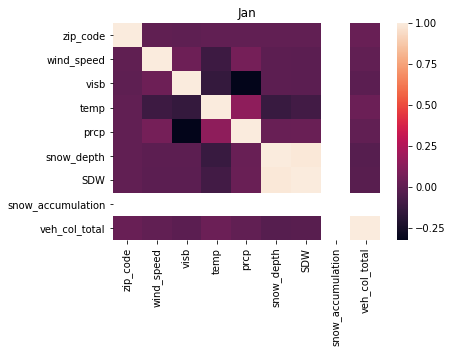

zip_code  wind_speed  visb  temp  prcp  snow_depth  \
zip_code                1.0         NaN   NaN   NaN   NaN         NaN   
wind_speed              NaN         1.0   NaN   NaN   NaN         NaN   
visb                    NaN         NaN   1.0   NaN   NaN         NaN   
temp                    NaN         NaN   NaN   1.0   NaN         NaN   
prcp                    NaN         NaN   NaN   NaN   1.0         NaN   
snow_depth              NaN         NaN   NaN   NaN   NaN    1.000000   
SDW                     NaN         NaN   NaN   NaN   NaN    0.987947   
snow_accumulation       NaN         NaN   NaN   NaN   NaN         NaN   
veh_col_total           NaN         NaN   NaN   NaN   NaN         NaN   

                        SDW  snow_accumulation  veh_col_total  
zip_code                NaN                NaN            NaN  
wind_speed              NaN                NaN            NaN  
visb                    NaN                NaN            NaN  
temp                    NaN                NaN            NaN  
prcp                    NaN                NaN            NaN  
snow_depth         0.987947                NaN            NaN  
SDW                1.000000                NaN            NaN  
snow_accumulation       NaN                NaN            NaN  
veh_col_total           NaN                NaN            1.0

In [104]:
corr1 = corrByMonth(df_cw,'01')
corrMat(corr1,'Jan')
corr1[corr1>0.5]
#corr1[corr1<-0.5]
#no corr1< -0.5

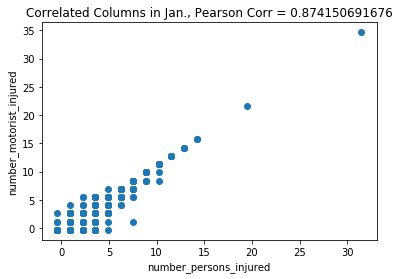

In [24]:
df_month1 = df_cw[df_cw['month']=='01']
plt.scatter(df_month1['number_persons_injured'],df_month1['number_motorist_injured'])
corr_temp = np.corrcoef(df_month1['number_persons_injured'],df_month1['number_motorist_injured'])[0][1]
plt.xlabel('number_persons_injured')
plt.ylabel('number_motorist_injured')
plt.title('Correlated Columns in Jan., Pearson Corr = %s'%corr_temp)
plt.savefig('jan_motor.jpg')
plt.show()


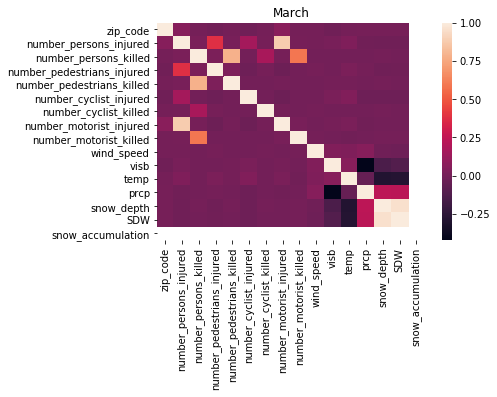

zip_code  number_persons_injured  \
zip_code                         1.0                     NaN   
number_persons_injured           NaN                1.000000   
number_persons_killed            NaN                     NaN   
number_pedestrians_injured       NaN                     NaN   
number_pedestrians_killed        NaN                     NaN   
number_cyclist_injured           NaN                     NaN   
number_cyclist_killed            NaN                     NaN   
number_motorist_injured          NaN                0.882891   
number_motorist_killed           NaN                     NaN   
wind_speed                       NaN                     NaN   
visb                             NaN                     NaN   
temp                             NaN                     NaN   
prcp                             NaN                     NaN   
snow_depth                       NaN                     NaN   
SDW                              NaN                     NaN   
snow_accumulation                NaN                     NaN   

                            number_persons_killed  number_pedestrians_injured  \
zip_code                                      NaN                         NaN   
number_persons_injured                        NaN                         NaN   
number_persons_killed                    1.000000                         NaN   
number_pedestrians_injured                    NaN                         1.0   
number_pedestrians_killed                0.787075                         NaN   
number_cyclist_injured                        NaN                         NaN   
number_cyclist_killed                         NaN                         NaN   
number_motorist_injured                       NaN                         NaN   
number_motorist_killed                   0.593261                         NaN   
wind_speed                                    NaN                         NaN   
visb                                          NaN                         NaN   
temp                                          NaN                         NaN   
prcp                                          NaN                         NaN   
snow_depth                                    NaN                         NaN   
SDW                                           NaN                         NaN   
snow_accumulation                             NaN                         NaN   

                            number_pedestrians_killed  number_cyclist_injured  \
zip_code                                          NaN                     NaN   
number_persons_injured                            NaN                     NaN   
number_persons_killed                        0.787075                     NaN   
number_pedestrians_injured                        NaN                     NaN   
number_pedestrians_killed                    1.000000                     NaN   
number_cyclist_injured                            NaN                     1.0   
number_cyclist_killed                             NaN                     NaN   
number_motorist_injured                           NaN                     NaN   
number_motorist_killed                            NaN                     NaN   
wind_speed                                        NaN                     NaN   
visb                                              NaN                     NaN   
temp                                              NaN                     NaN   
prcp                                              NaN                     NaN   
snow_depth                                        NaN                     NaN   
SDW                                               NaN                     NaN   
snow_accumulation                                 NaN                     NaN   

                            number_cyclist_killed  number_motorist_injured  \
zip_code                                      NaN                      NaN   
number_persons_injured     

In [81]:
corr3 = corrByMonth(df_cw,'03')
corrMat(corr3,'March')
corr3[corr1>0.5]



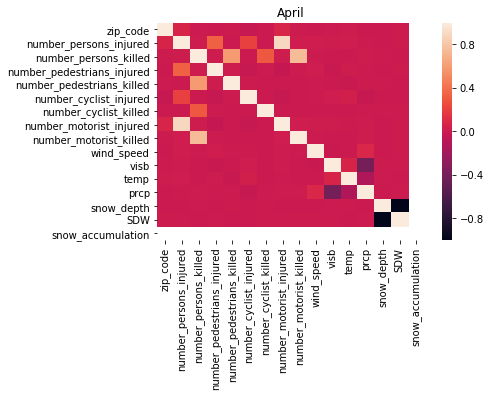

zip_code  number_persons_injured  \
zip_code                         1.0                     NaN   
number_persons_injured           NaN                1.000000   
number_persons_killed            NaN                     NaN   
number_pedestrians_injured       NaN                     NaN   
number_pedestrians_killed        NaN                     NaN   
number_cyclist_injured           NaN                     NaN   
number_cyclist_killed            NaN                     NaN   
number_motorist_injured          NaN                0.896685   
number_motorist_killed           NaN                     NaN   
wind_speed                       NaN                     NaN   
visb                             NaN                     NaN   
temp                             NaN                     NaN   
prcp                             NaN                     NaN   
snow_depth                       NaN                     NaN   
SDW                              NaN                     NaN   
snow_accumulation                NaN                     NaN   

                            number_persons_killed  number_pedestrians_injured  \
zip_code                                      NaN                         NaN   
number_persons_injured                        NaN                         NaN   
number_persons_killed                    1.000000                         NaN   
number_pedestrians_injured                    NaN                         1.0   
number_pedestrians_killed                0.588063                         NaN   
number_cyclist_injured                        NaN                         NaN   
number_cyclist_killed                         NaN                         NaN   
number_motorist_injured                       NaN                         NaN   
number_motorist_killed                   0.742378                         NaN   
wind_speed                                    NaN                         NaN   
visb                                          NaN                         NaN   
temp                                          NaN                         NaN   
prcp                                          NaN                         NaN   
snow_depth                                    NaN                         NaN   
SDW                                           NaN                         NaN   
snow_accumulation                             NaN                         NaN   

                            number_pedestrians_killed  number_cyclist_injured  \
zip_code                                          NaN                     NaN   
number_persons_injured                            NaN                     NaN   
number_persons_killed                        0.588063                     NaN   
number_pedestrians_injured                        NaN                     NaN   
number_pedestrians_killed                    1.000000                     NaN   
number_cyclist_injured                            NaN                     1.0   
number_cyclist_killed                             NaN                     NaN   
number_motorist_injured                           NaN                     NaN   
number_motorist_killed                            NaN                     NaN   
wind_speed                                        NaN                     NaN   
visb                                              NaN                     NaN   
temp                                              NaN                     NaN   
prcp                                              NaN                     NaN   
snow_depth                                        NaN                     NaN   
SDW                                               NaN                     NaN   
snow_accumulation                                 NaN                     NaN   

                            number_cyclist_killed  number_motorist_injured  \
zip_code                                      NaN                      NaN   
number_persons_injured     

In [82]:
corr4 = corrByMonth(df_cw,'04')
corrMat(corr4,'April')
corr4[corr4>0.5]
#corr4<0.5: SW and SDW corr = -1.0

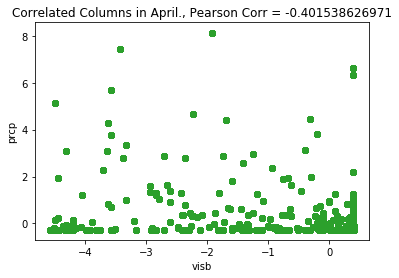

-0.40153862697075754

In [54]:
df_month4 = df_cw[df_cw['month']=='04']
df_month4 = df_month4.dropna(axis = 0, how = "any")
x = 'visb'
y = 'prcp'
plt.scatter(df_month4[x],df_month4[y])
corr_temp = np.corrcoef(df_month4[x],df_month4[y])[0][1]
plt.xlabel(x)
plt.ylabel(y)
plt.title('Correlated Columns in April., Pearson Corr = %s'%corr_temp)
plt.savefig('Ap_vp.jpg')
plt.show()

corr_temp

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


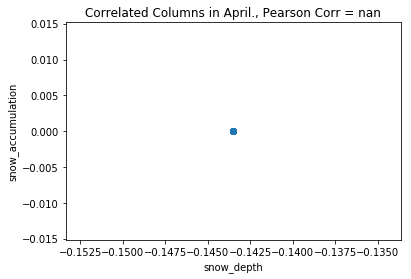

nan

In [55]:
df_month4 = df_cw[df_cw['month']=='04']
df_month4 = df_month4.dropna(axis = 0, how = "any")
x = 'snow_depth'
y = 'snow_accumulation'
plt.scatter(df_month4[x],df_month4[y])
corr_temp = np.corrcoef(df_month4[x],df_month4[y])[0][1]
plt.xlabel(x)
plt.ylabel(y)
plt.title('Correlated Columns in April., Pearson Corr = %s'%corr_temp)
plt.savefig('Ap_sd.jpg')
plt.show()

corr_temp

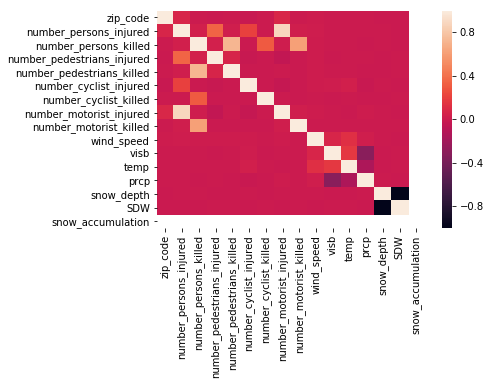

In [204]:
corrByMonth(df_cw,'05')

48273

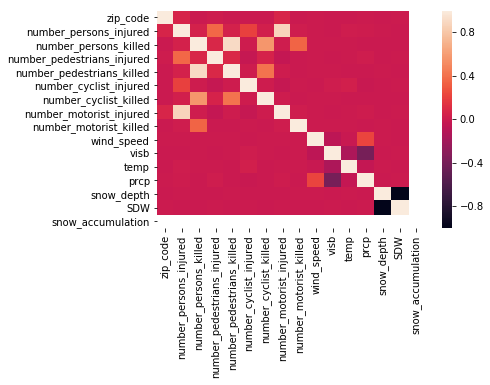

In [209]:
corrByMonth(df_cw,'10')

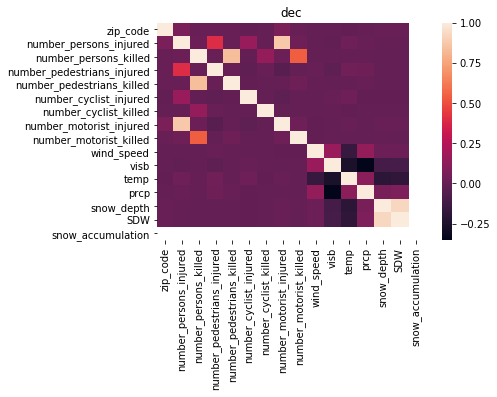

zip_code  number_persons_injured  \
zip_code                         1.0                     NaN   
number_persons_injured           NaN                1.000000   
number_persons_killed            NaN                     NaN   
number_pedestrians_injured       NaN                     NaN   
number_pedestrians_killed        NaN                     NaN   
number_cyclist_injured           NaN                     NaN   
number_cyclist_killed            NaN                     NaN   
number_motorist_injured          NaN                0.876061   
number_motorist_killed           NaN                     NaN   
wind_speed                       NaN                     NaN   
visb                             NaN                     NaN   
temp                             NaN                     NaN   
prcp                             NaN                     NaN   
snow_depth                       NaN                     NaN   
SDW                              NaN                     NaN   
snow_accumulation                NaN                     NaN   

                            number_persons_killed  number_pedestrians_injured  \
zip_code                                      NaN                         NaN   
number_persons_injured                        NaN                         NaN   
number_persons_killed                    1.000000                         NaN   
number_pedestrians_injured                    NaN                         1.0   
number_pedestrians_killed                0.841279                         NaN   
number_cyclist_injured                        NaN                         NaN   
number_cyclist_killed                         NaN                         NaN   
number_motorist_injured                       NaN                         NaN   
number_motorist_killed                   0.540709                         NaN   
wind_speed                                    NaN                         NaN   
visb                                          NaN                         NaN   
temp                                          NaN                         NaN   
prcp                                          NaN                         NaN   
snow_depth                                    NaN                         NaN   
SDW                                           NaN                         NaN   
snow_accumulation                             NaN                         NaN   

                            number_pedestrians_killed  number_cyclist_injured  \
zip_code                                          NaN                     NaN   
number_persons_injured                            NaN                     NaN   
number_persons_killed                        0.841279                     NaN   
number_pedestrians_injured                        NaN                     NaN   
number_pedestrians_killed                    1.000000                     NaN   
number_cyclist_injured                            NaN                     1.0   
number_cyclist_killed                             NaN                     NaN   
number_motorist_injured                           NaN                     NaN   
number_motorist_killed                            NaN                     NaN   
wind_speed                                        NaN                     NaN   
visb                                              NaN                     NaN   
temp                                              NaN                     NaN   
prcp                                              NaN                     NaN   
snow_depth                                        NaN                     NaN   
SDW                                               NaN                     NaN   
snow_accumulation                                 NaN                     NaN   

                            number_cyclist_killed  number_motorist_injured  \
zip_code                                      NaN                      NaN   
number_persons_injured     

In [83]:
corr12 = corrByMonth(df_cw,'12')
corrMat(corr12,'dec')
corr12[corr12>0.5]



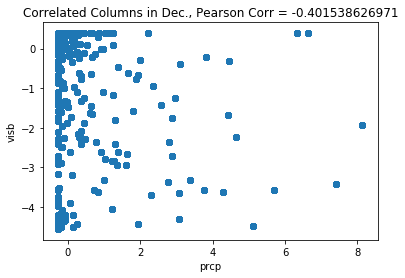

-0.40153862697075754

In [59]:
df_month4 = df_cw[df_cw['month']=='04']
df_month4 = df_month4.dropna(axis = 0, how = "any")
x = 'prcp'
y = 'visb'
plt.scatter(df_month4[x],df_month4[y])
corr_temp = np.corrcoef(df_month4[x],df_month4[y])[0][1]
plt.xlabel(x)
plt.ylabel(y)
plt.title('Correlated Columns in Dec., Pearson Corr = %s'%corr_temp)
plt.savefig('dec_vp.jpg')
plt.show()

corr_temp

In [85]:
def corrByZip(df,zip):
    df_zip = df[df['zip_code']==zip]
    corr = df_zip.corr()
    
    return corr

In [86]:
zips = list(df_cw['zip_code'].value_counts().index)

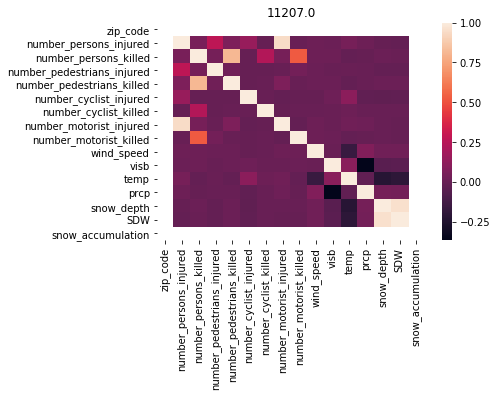

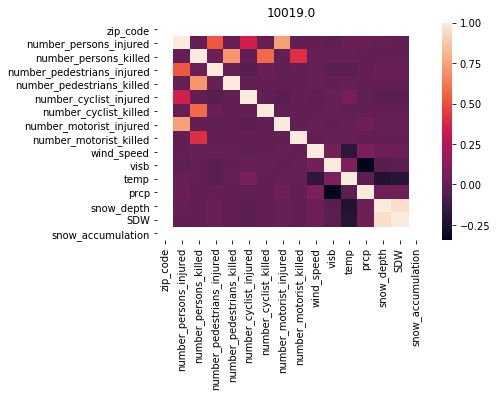

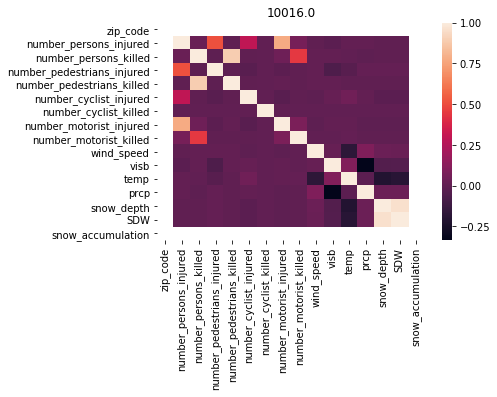

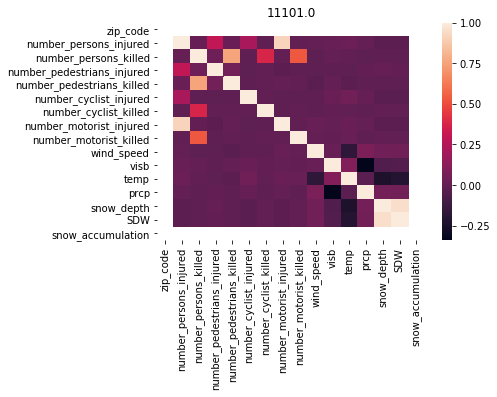

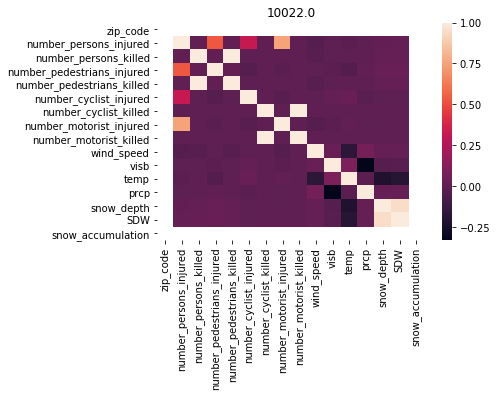

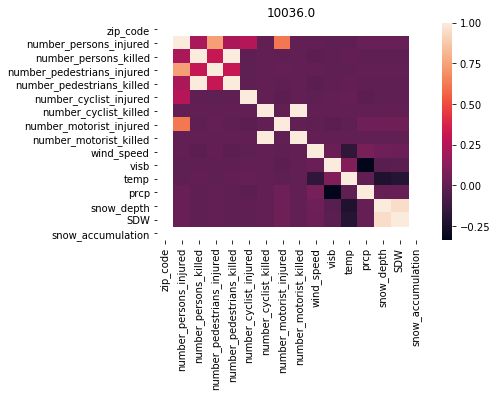

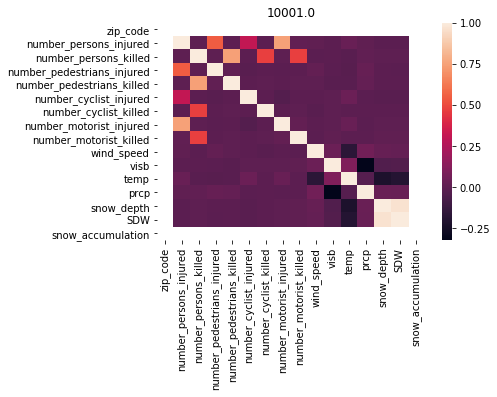

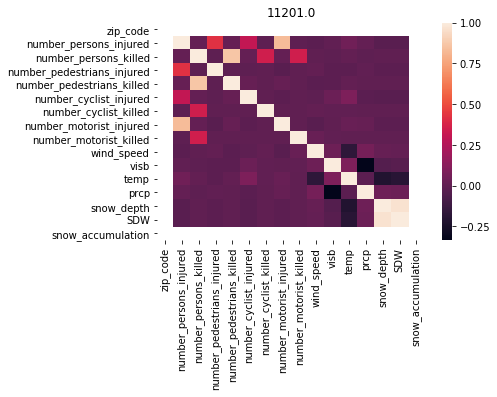

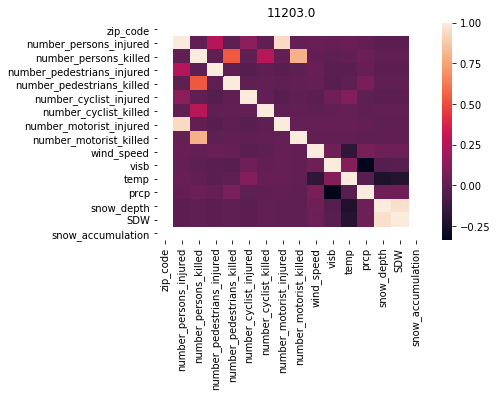

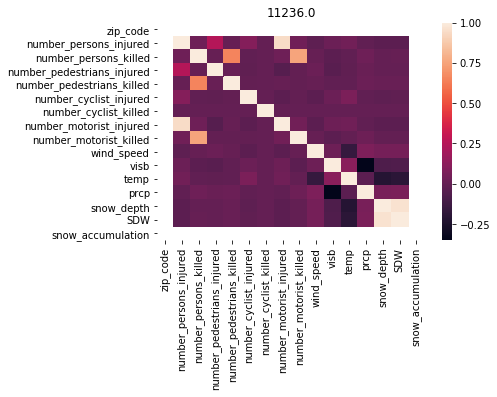

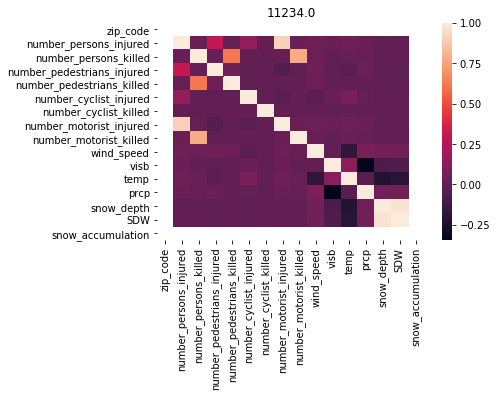

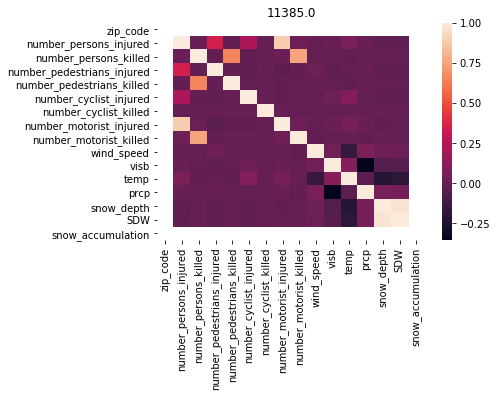

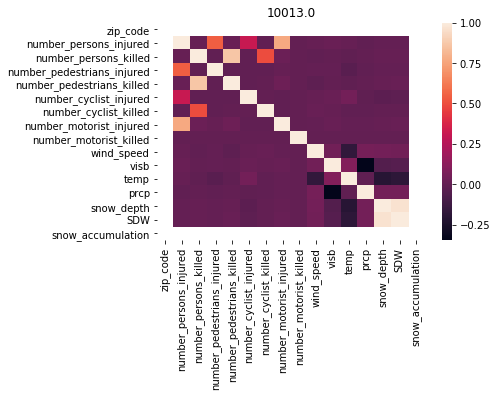

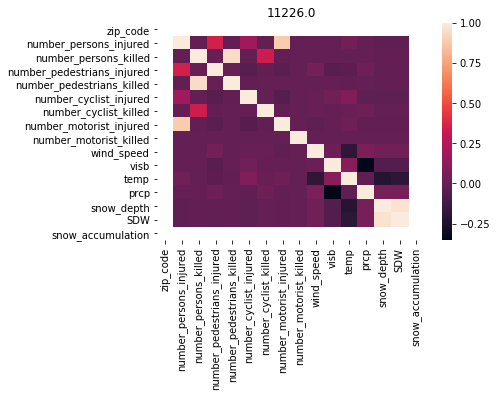

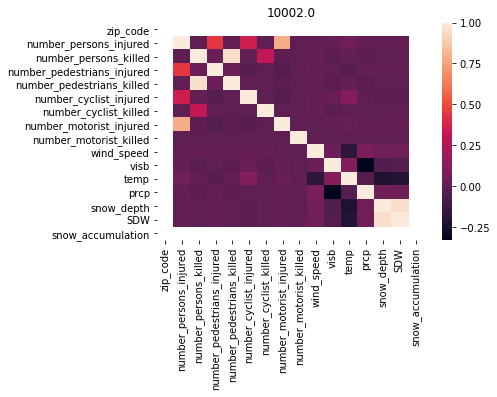

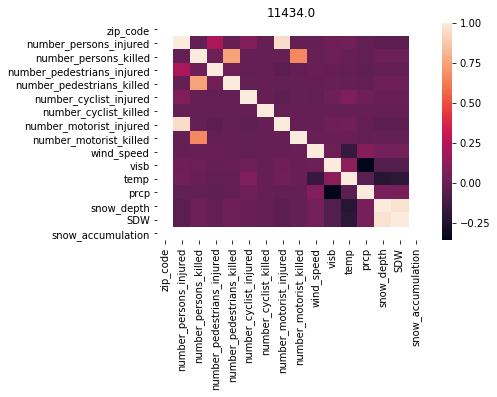

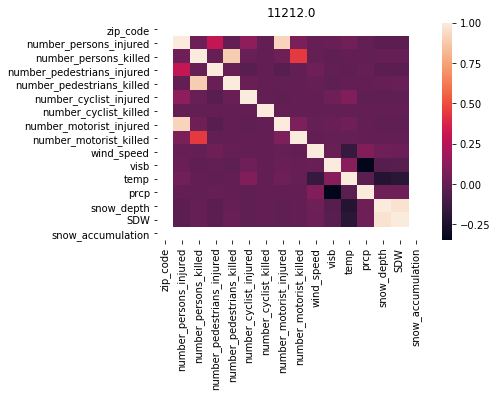

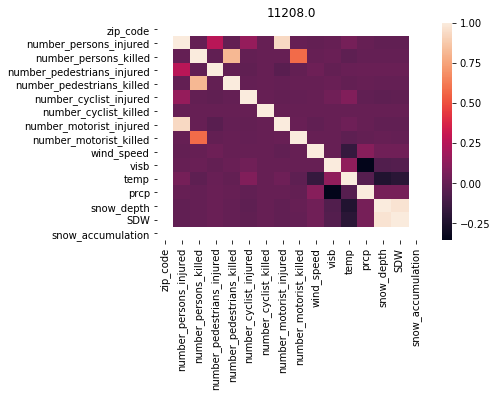

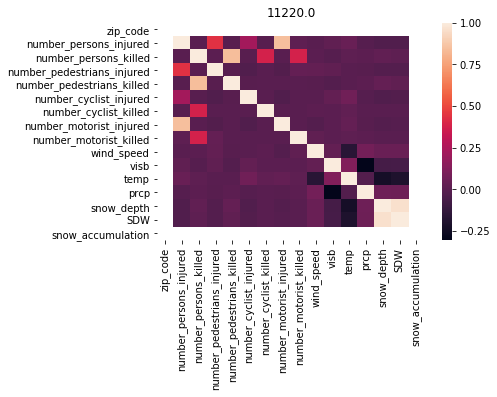

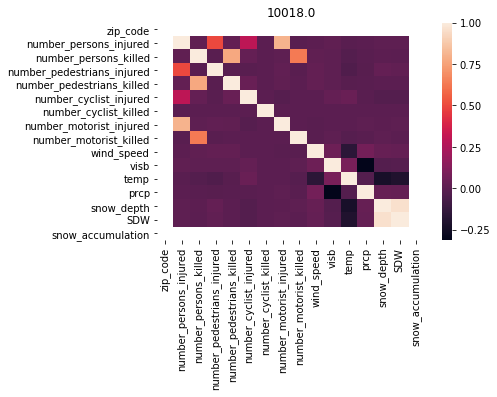

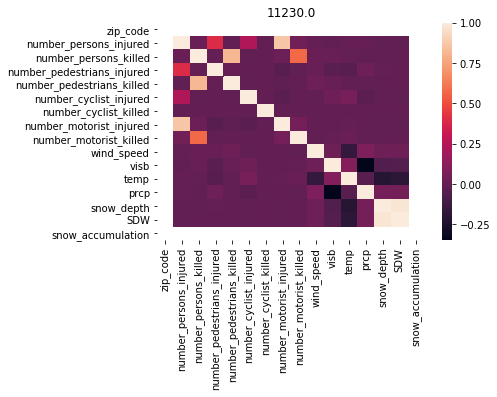

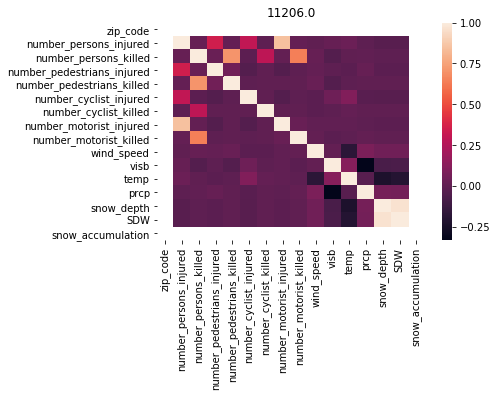

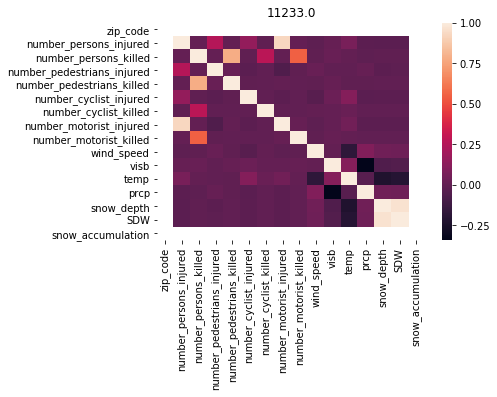

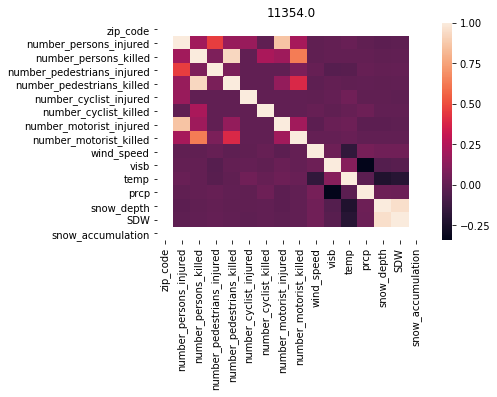

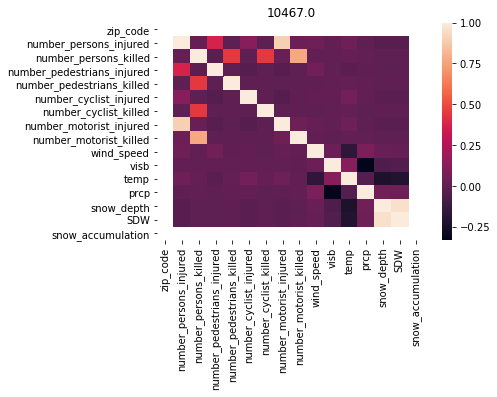

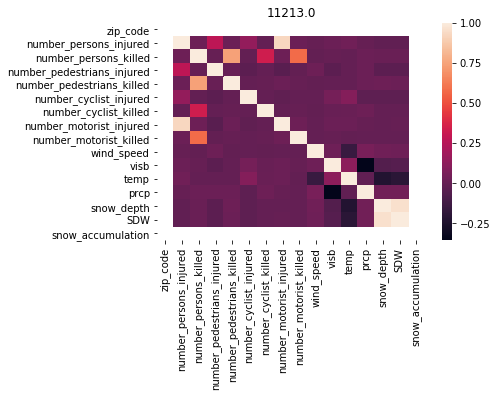

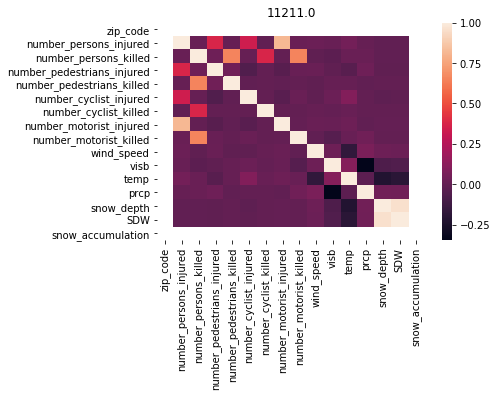

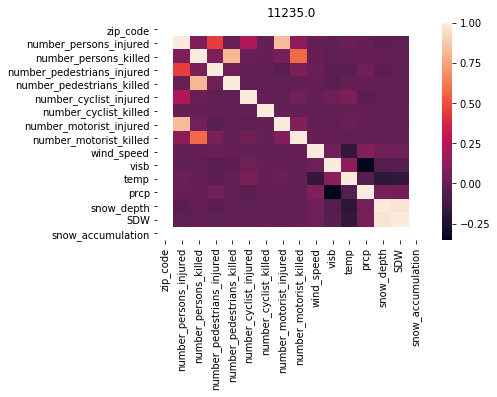

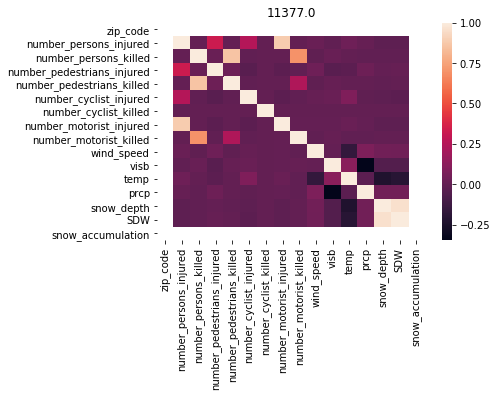

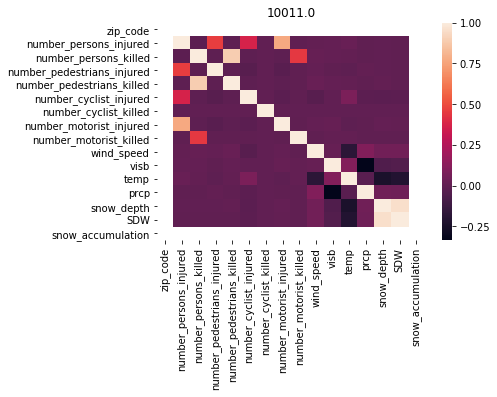

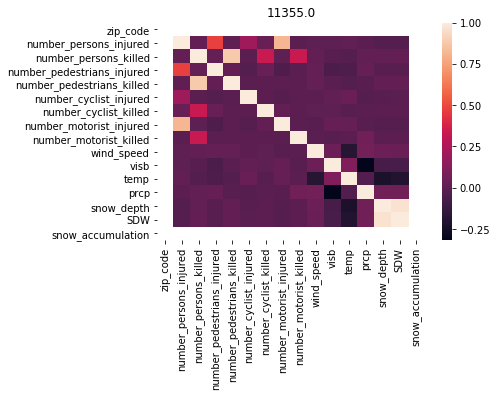

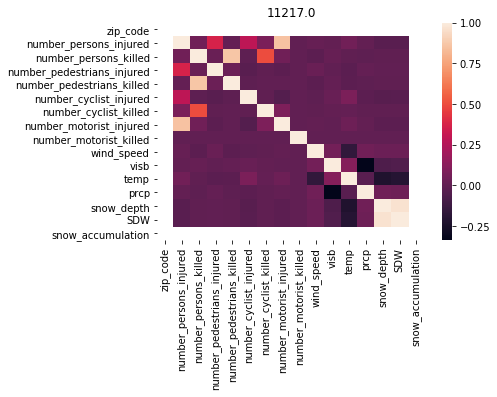

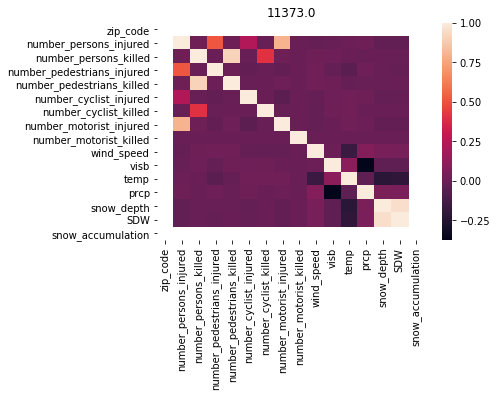

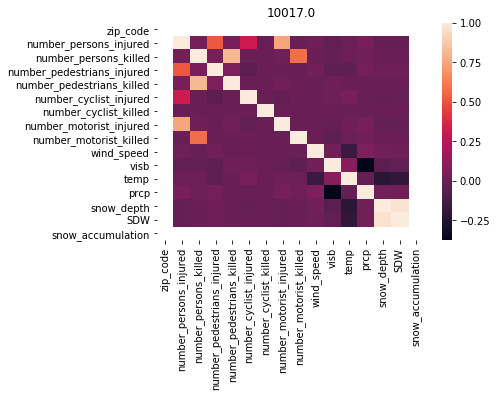

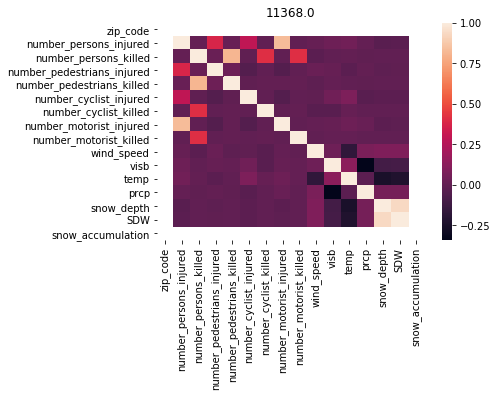

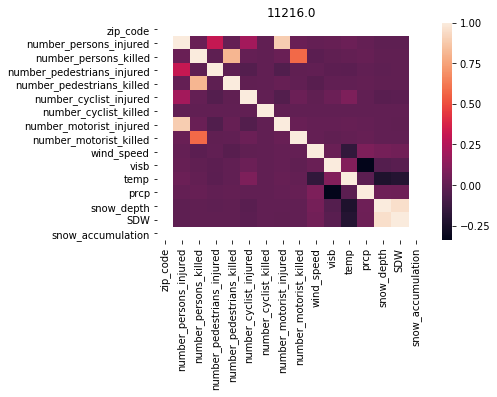

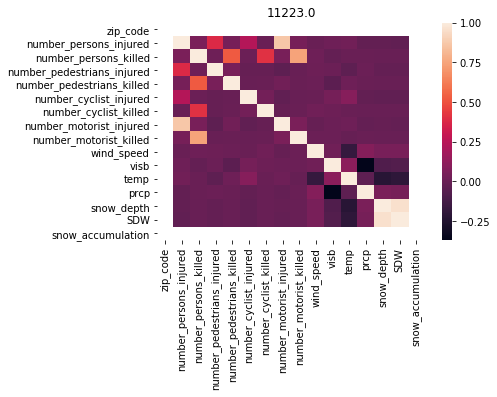

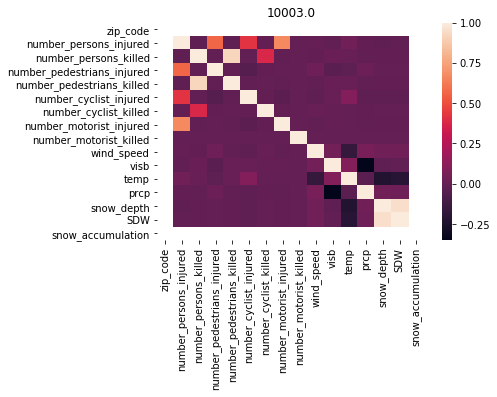

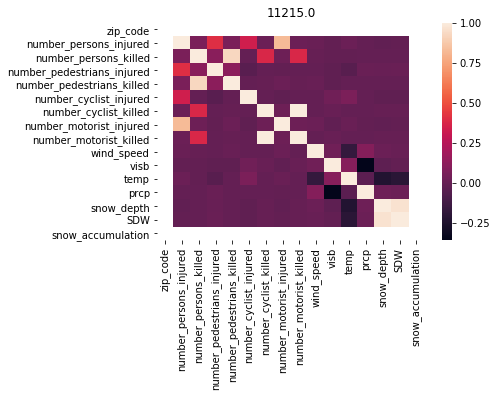

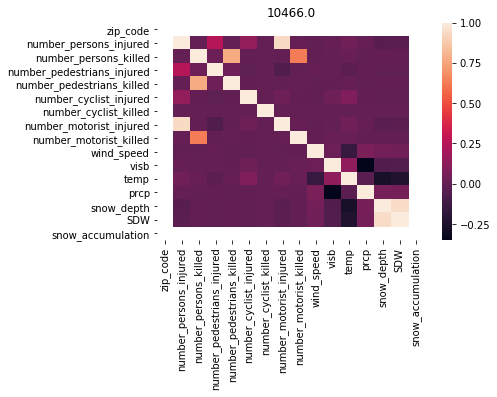

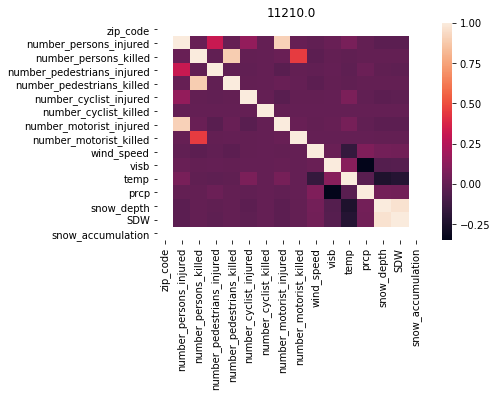

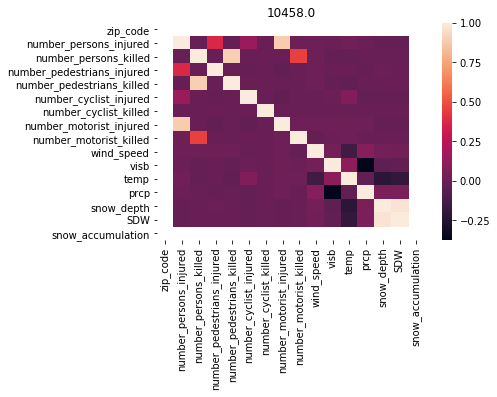

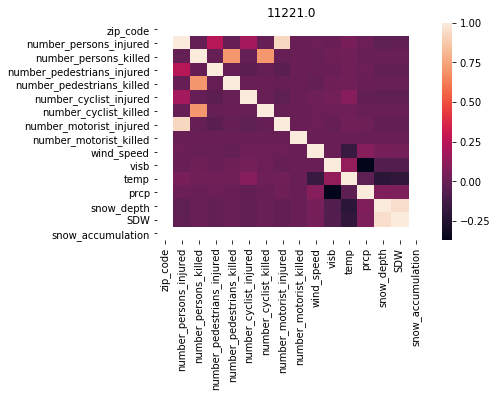

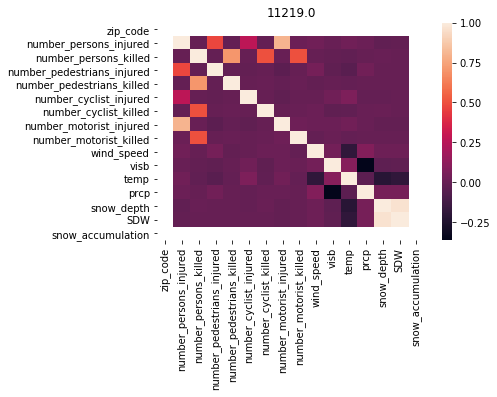

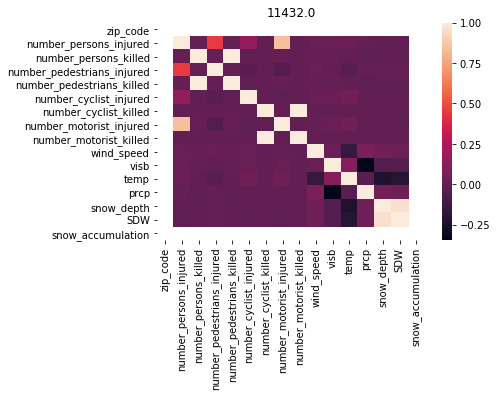

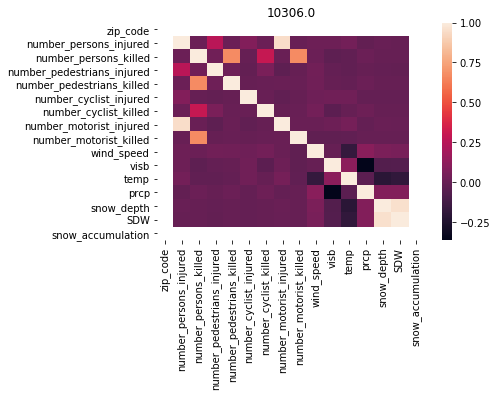

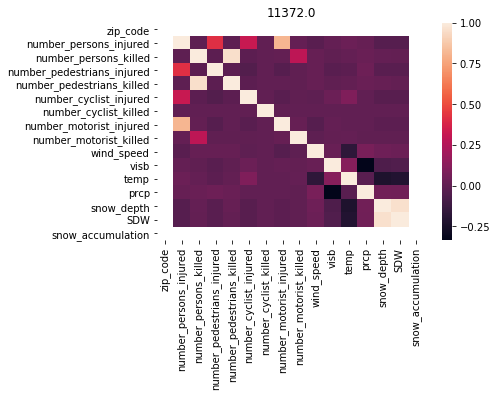

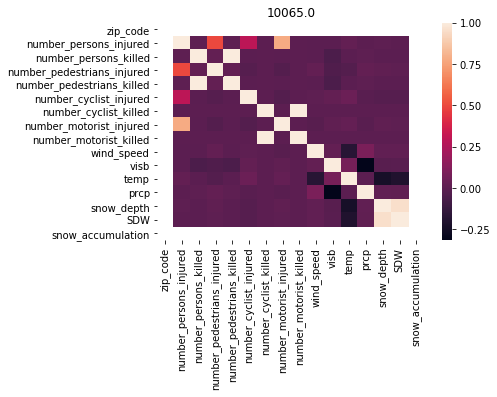

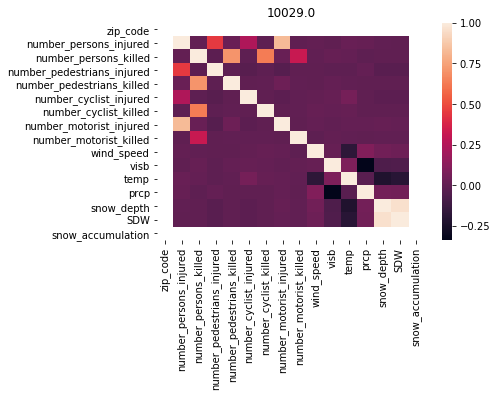

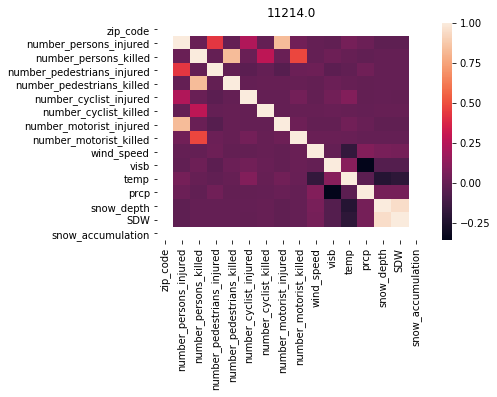

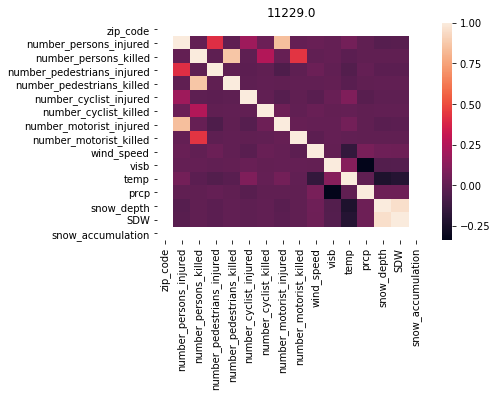

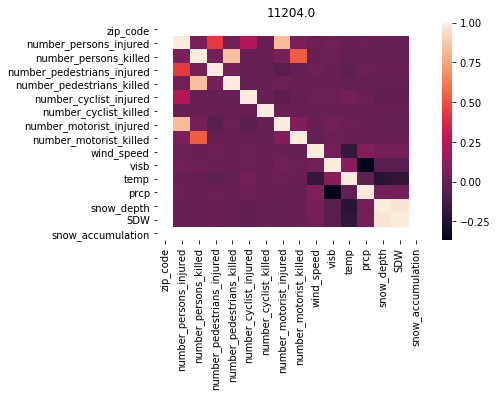

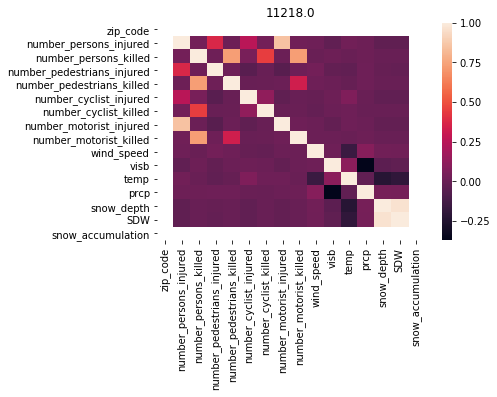

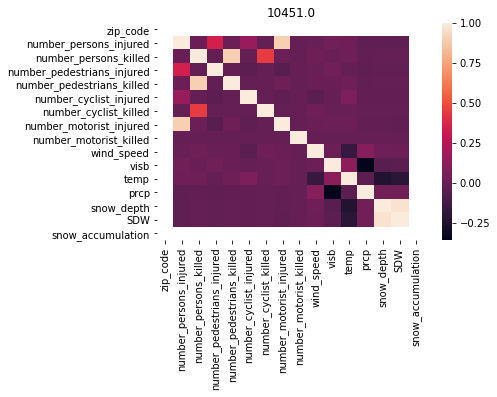

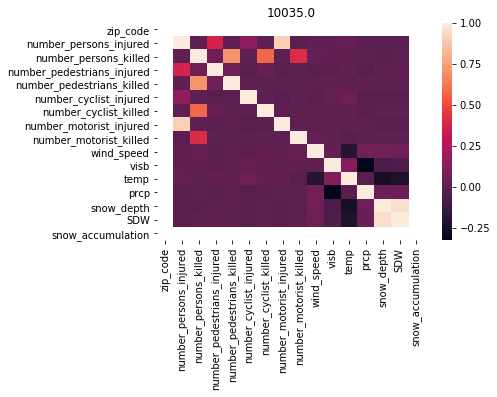

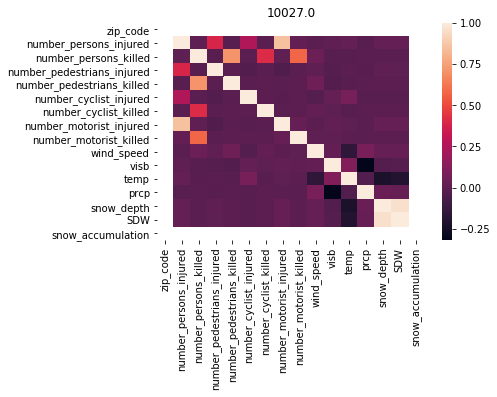

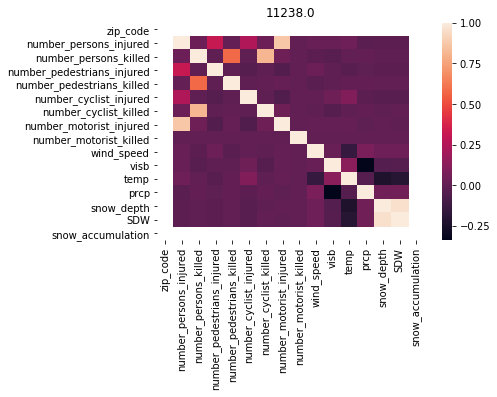

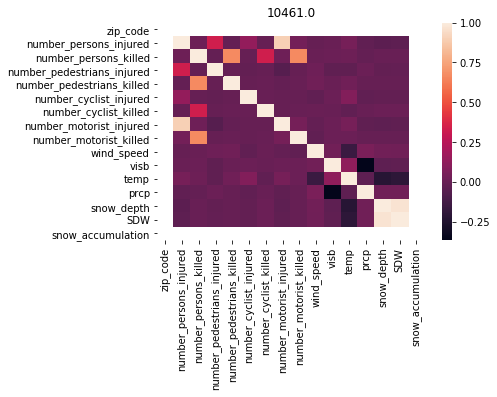

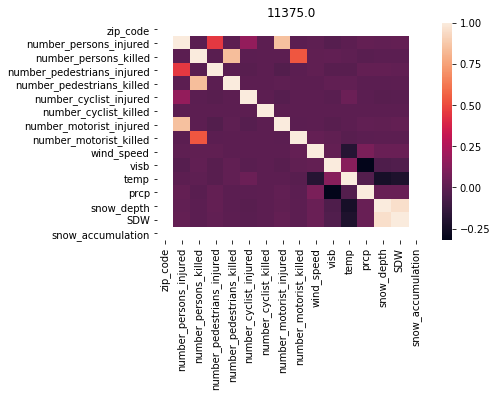

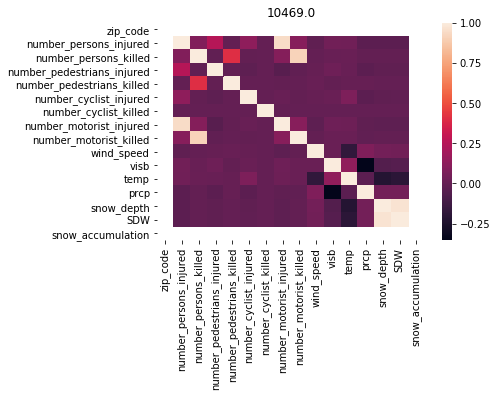

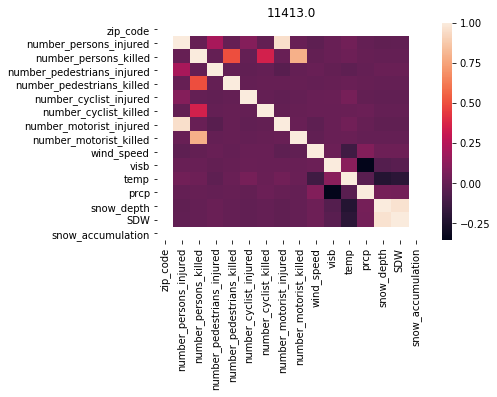

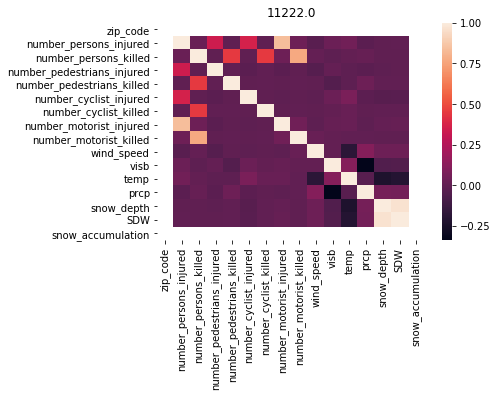

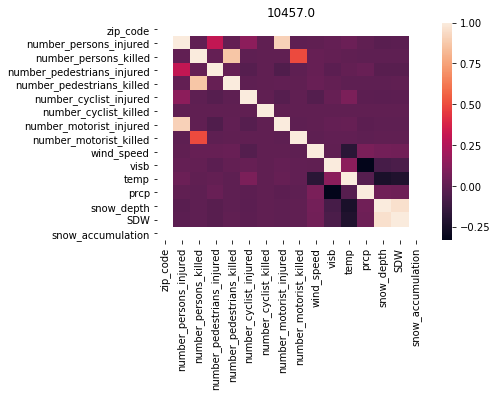

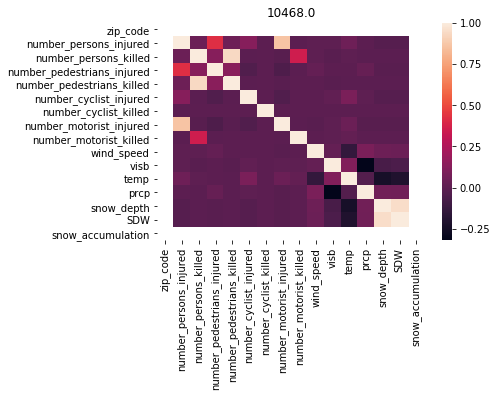

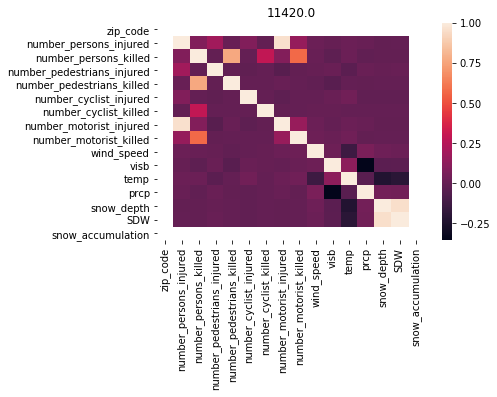

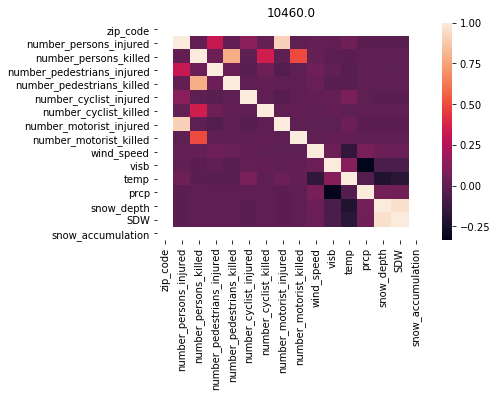

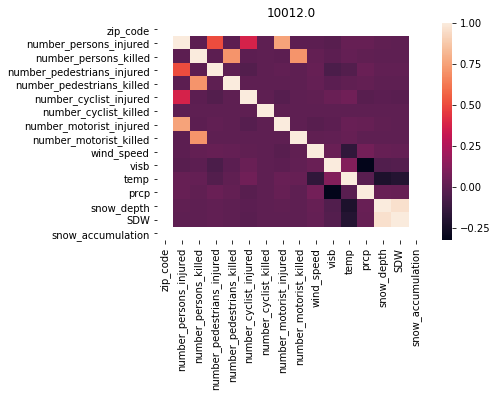

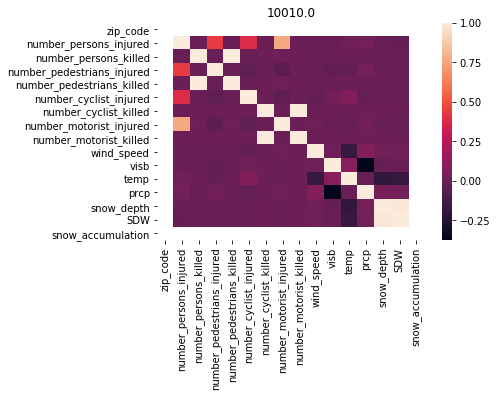

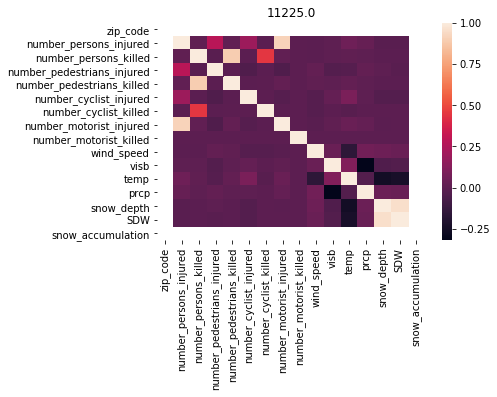

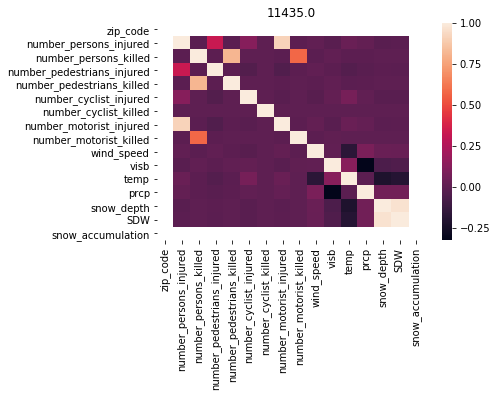

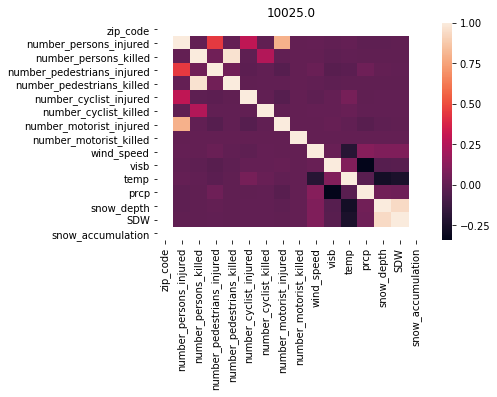

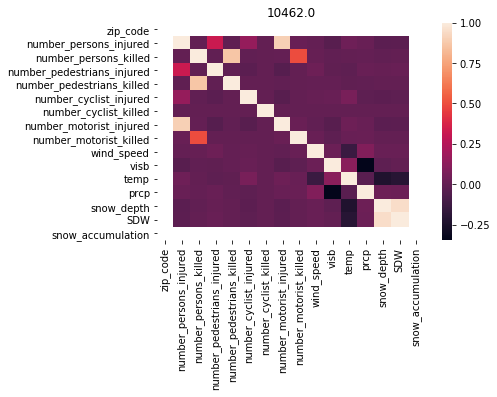

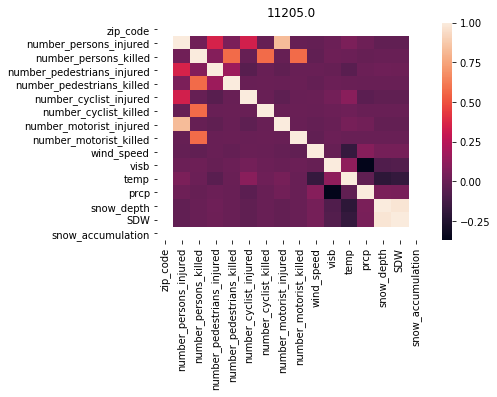

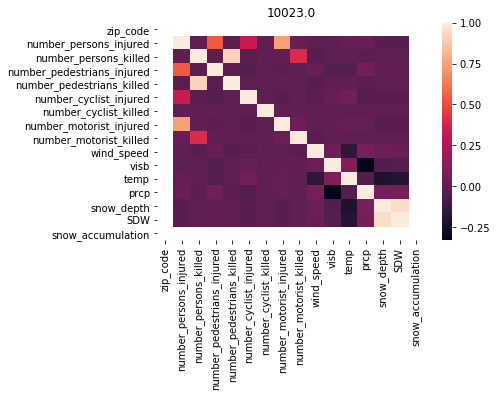

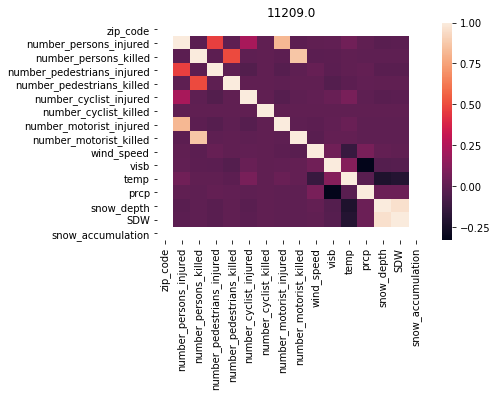

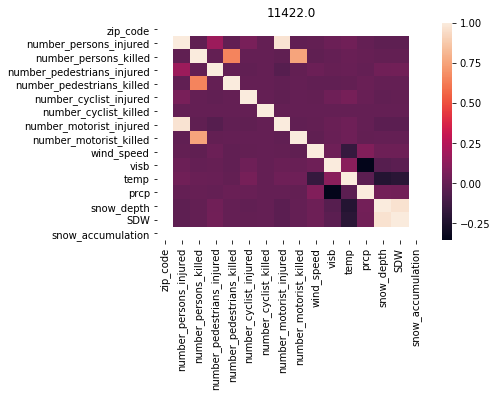

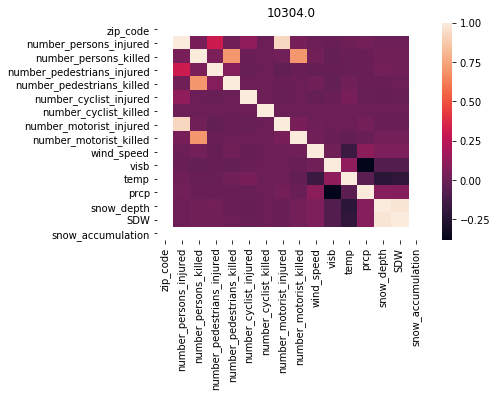

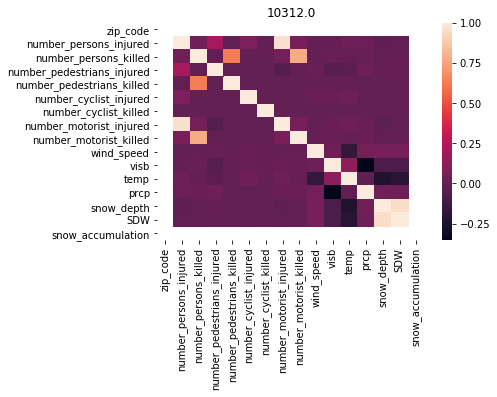

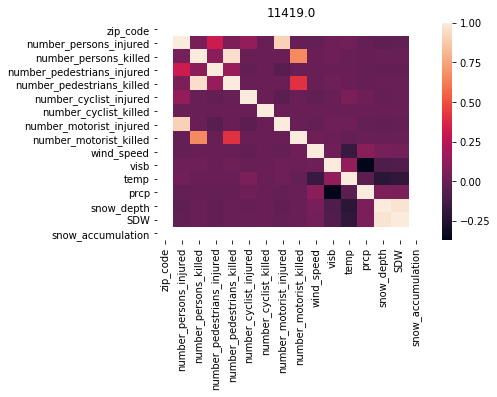

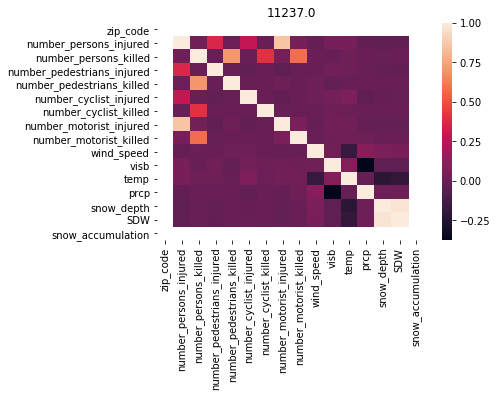

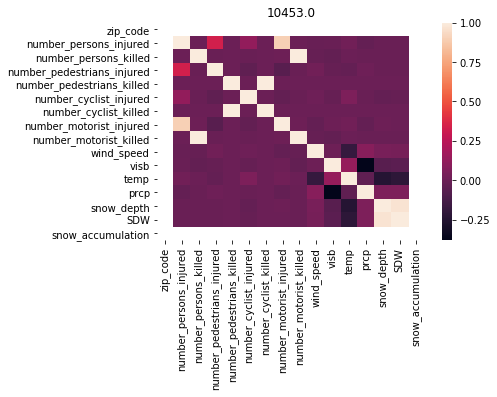

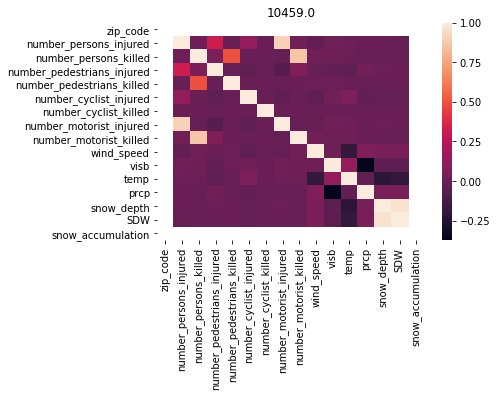

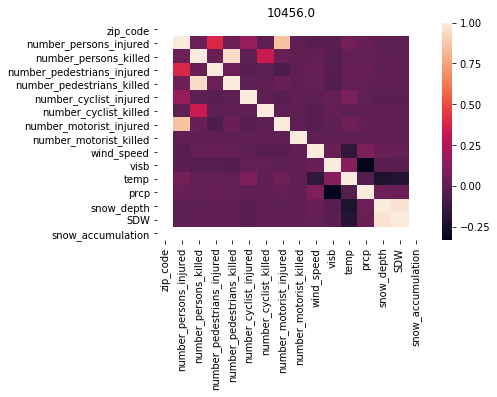

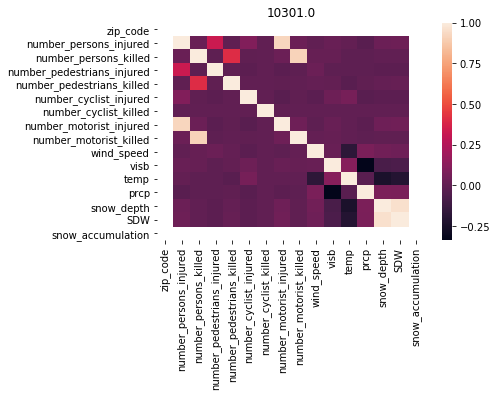

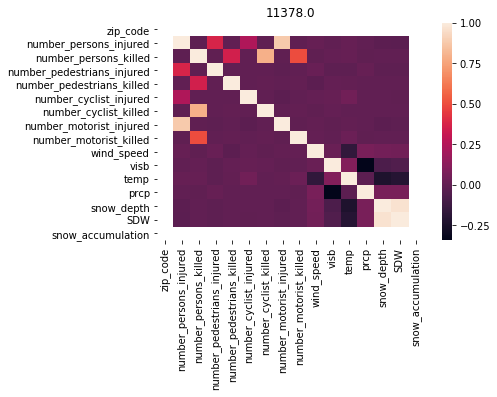

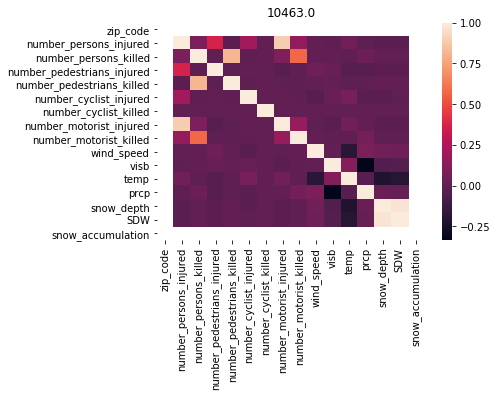

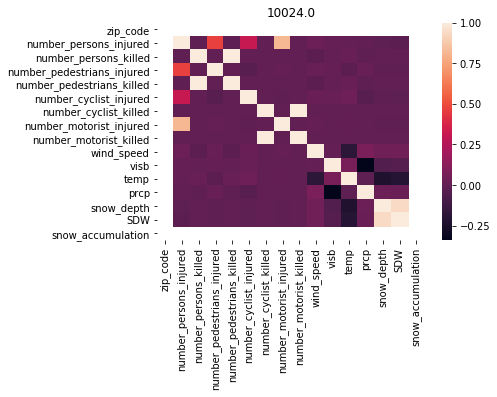

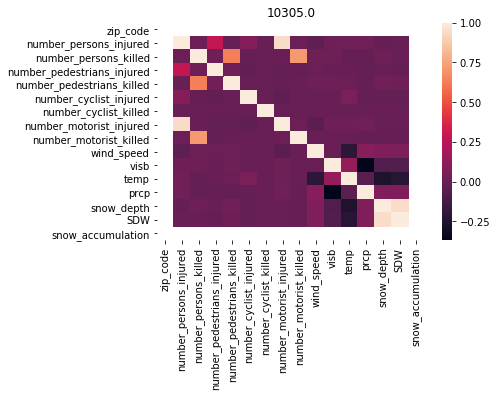

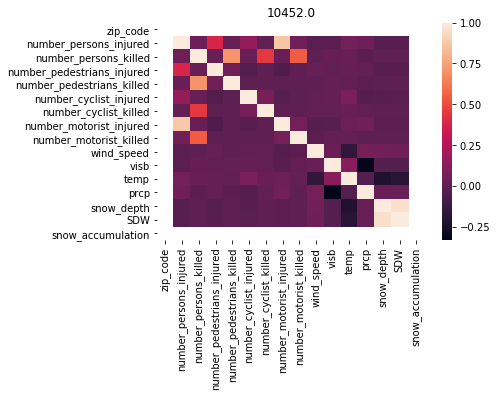

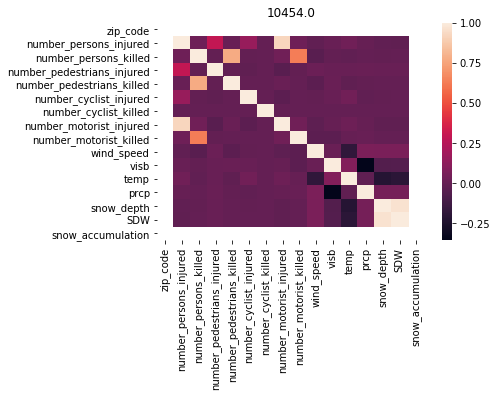

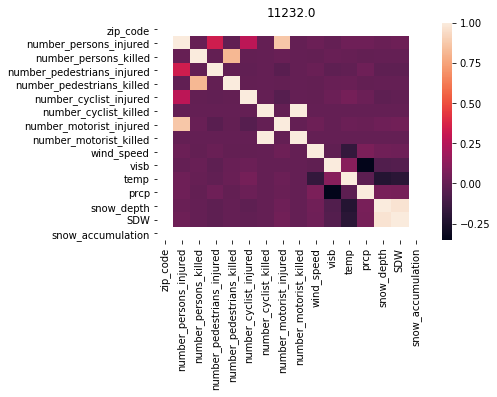

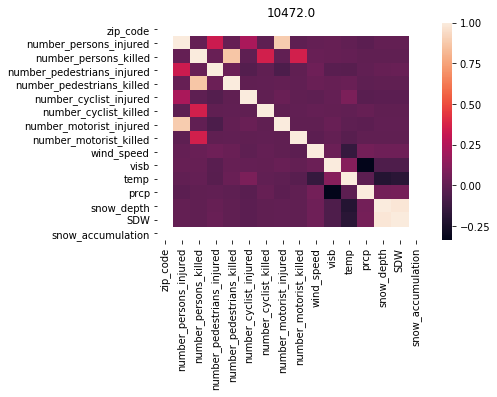

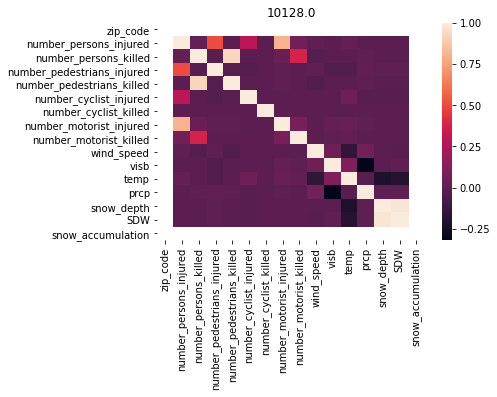

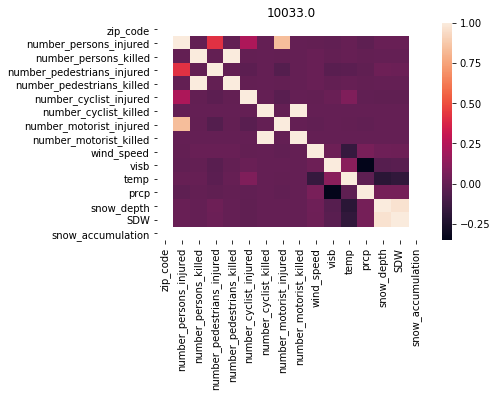

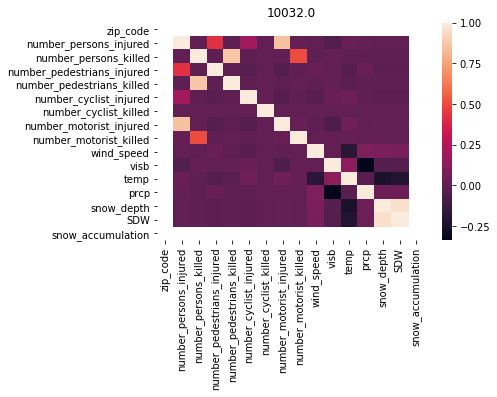

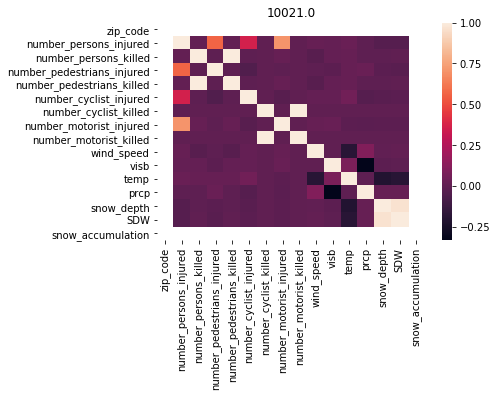

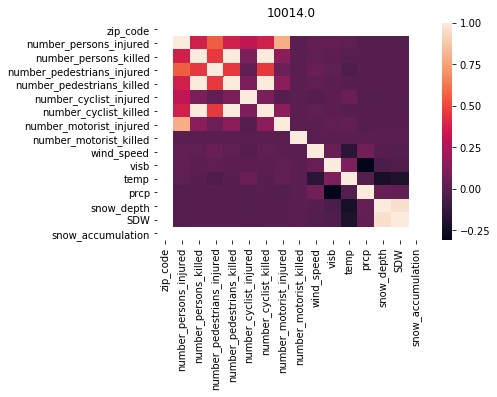

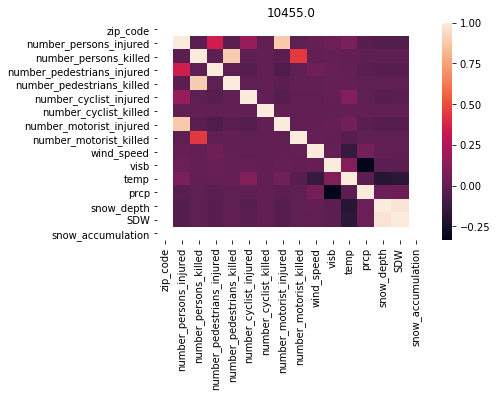

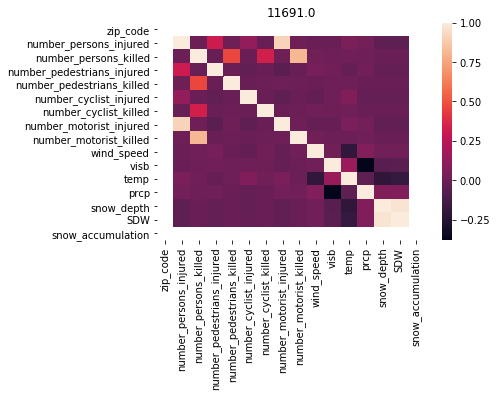

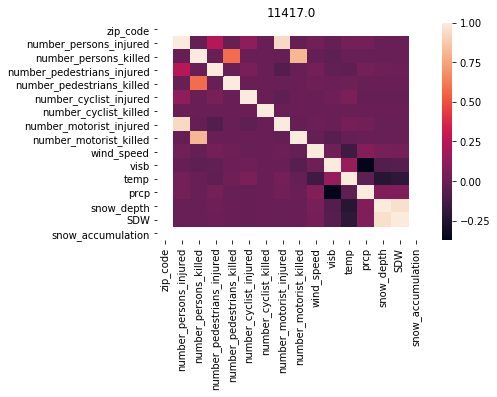

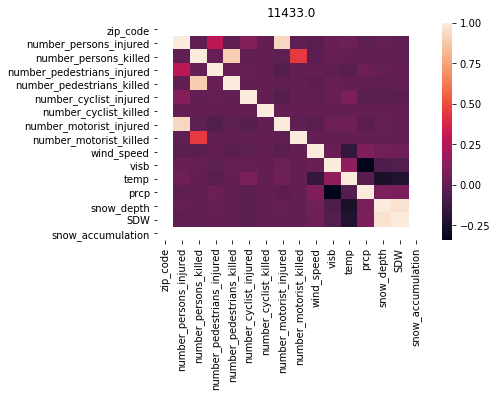

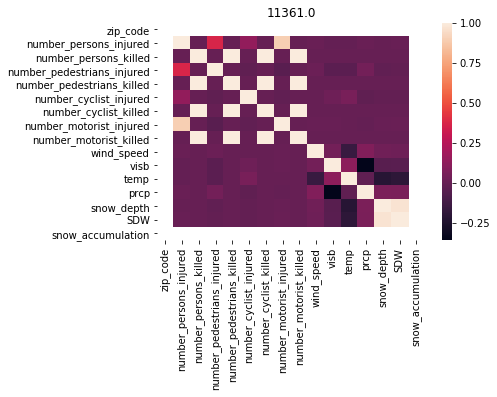

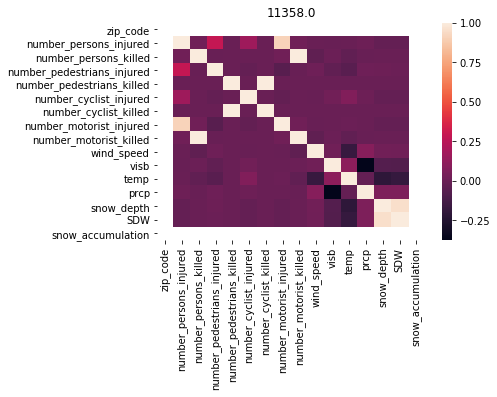

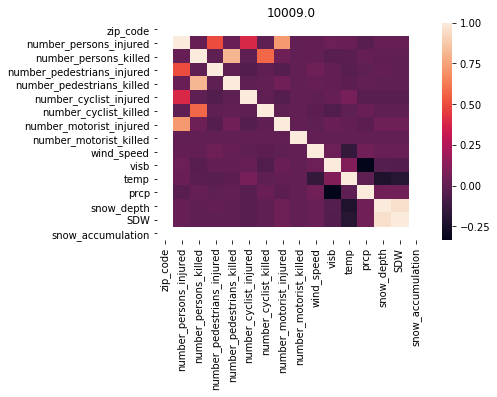

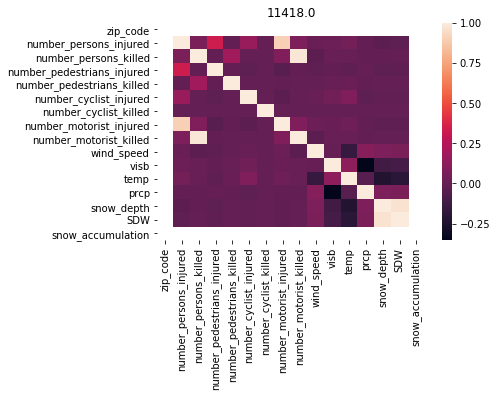

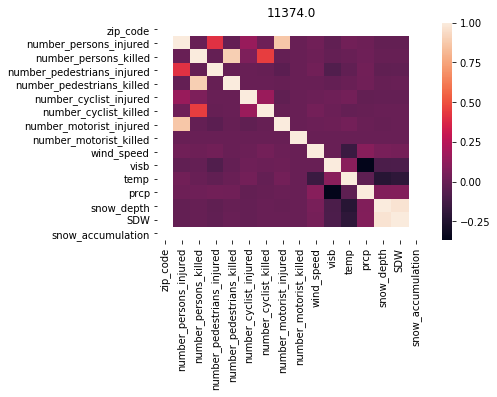

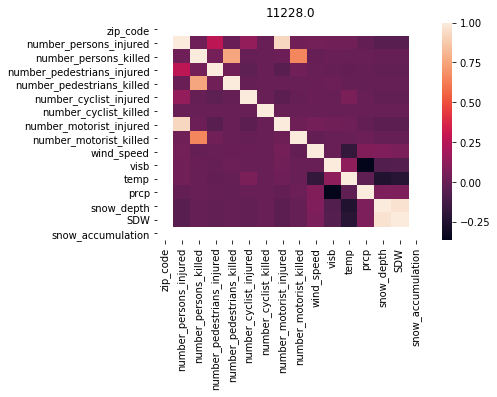

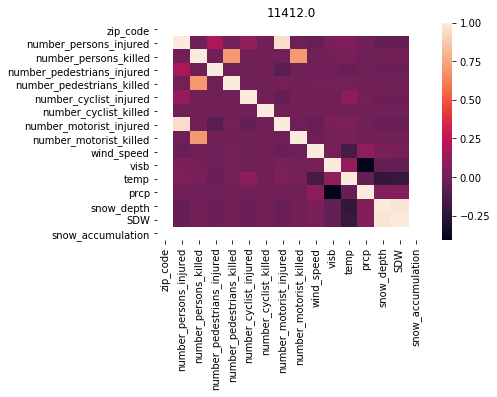

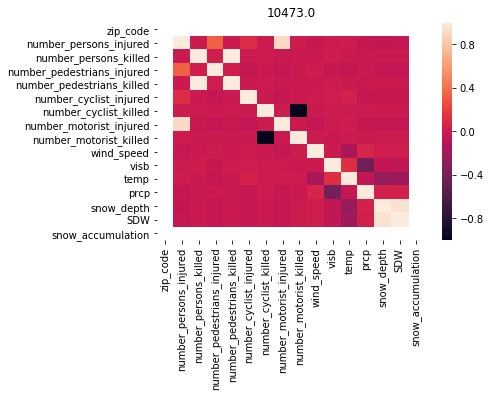

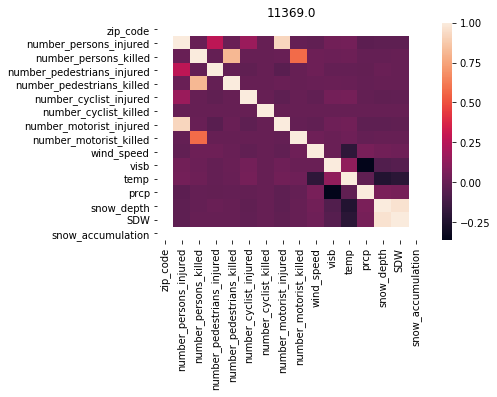

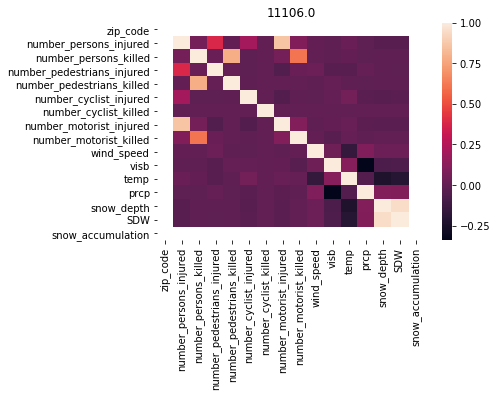

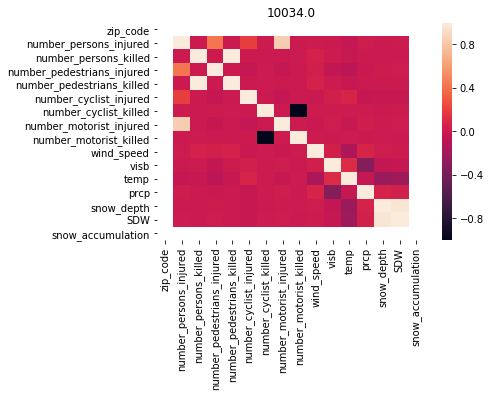

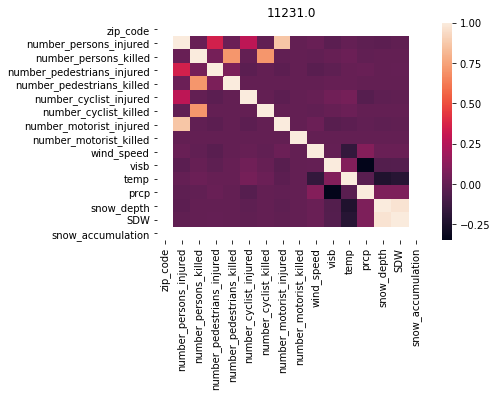

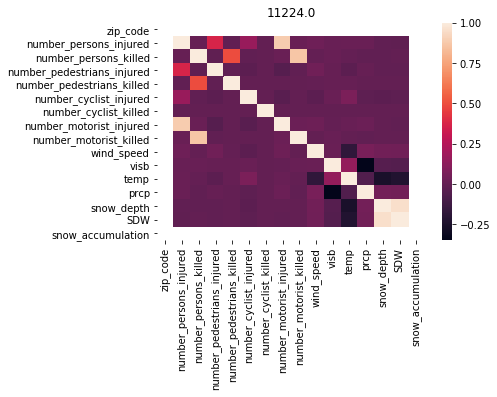

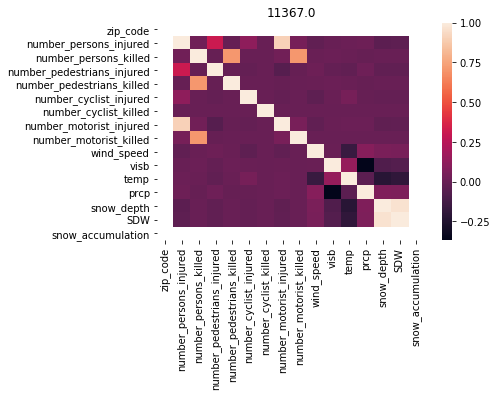

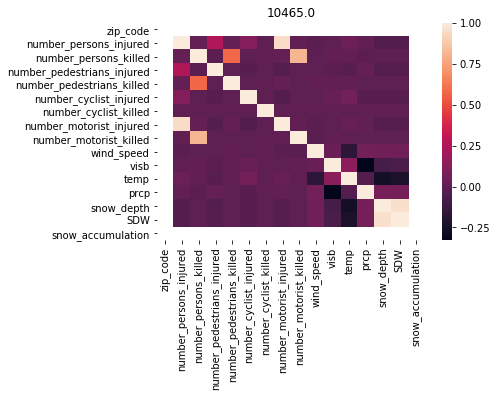

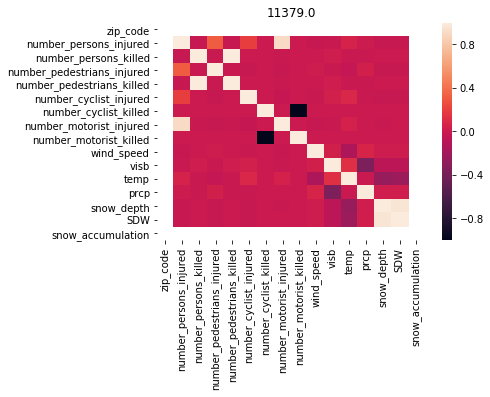

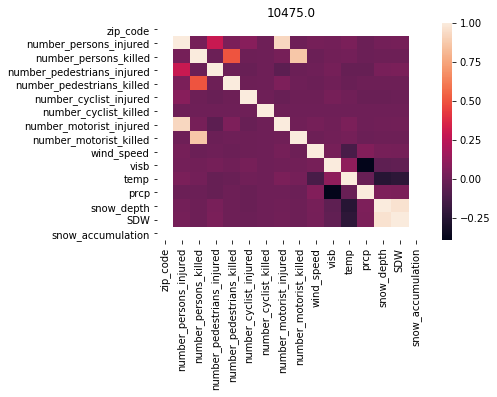

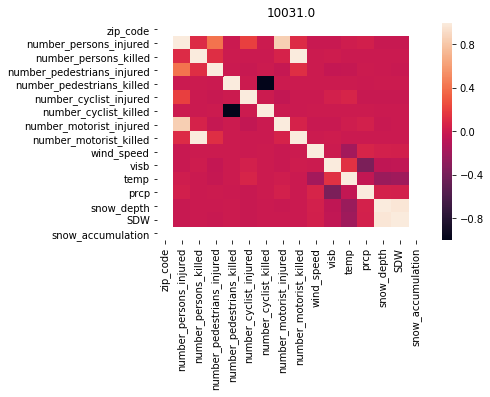

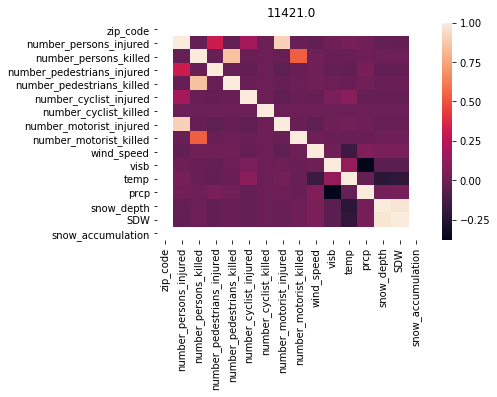

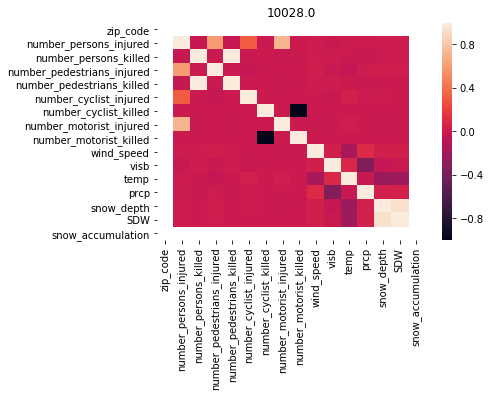

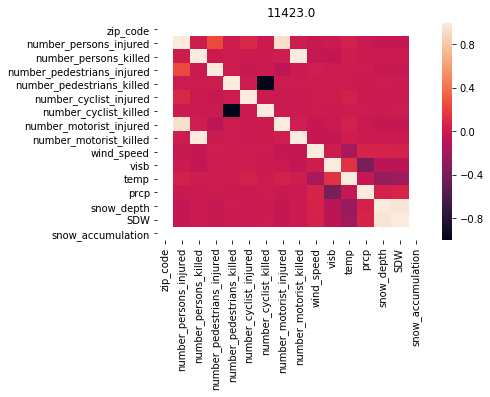

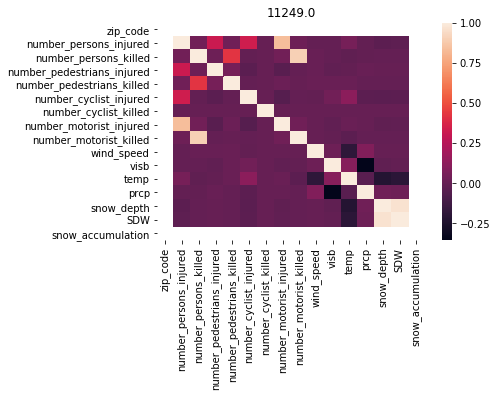

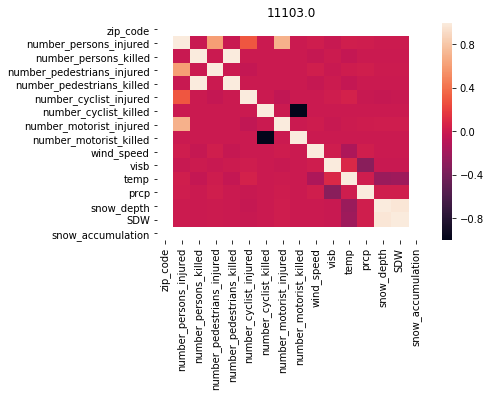

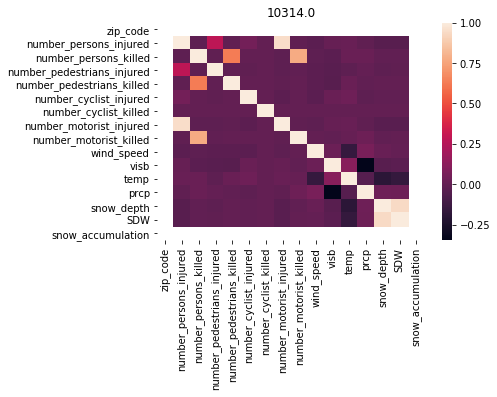

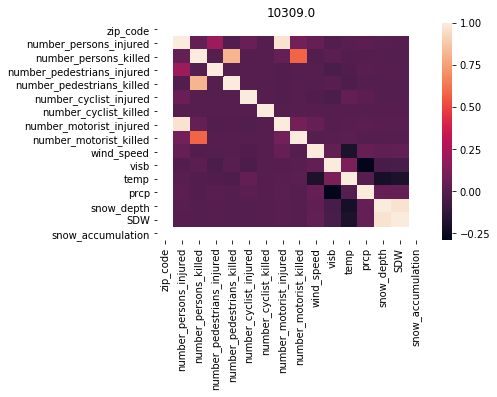

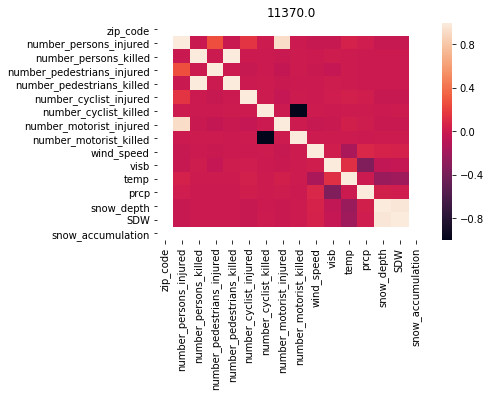

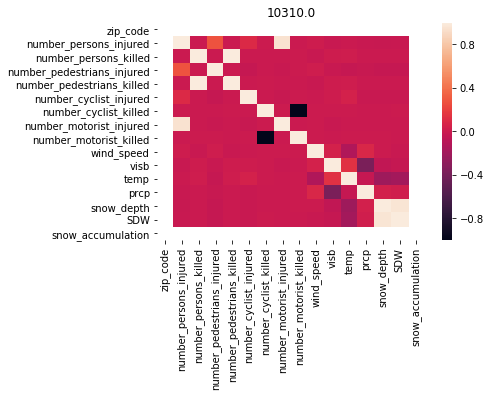

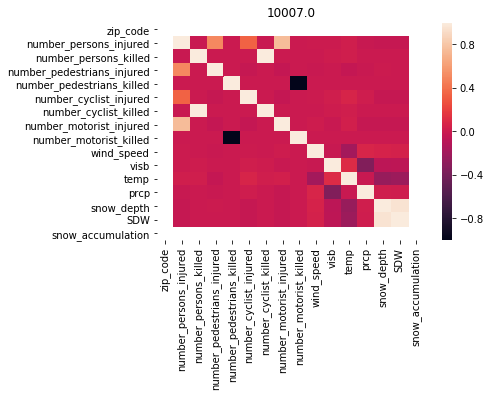

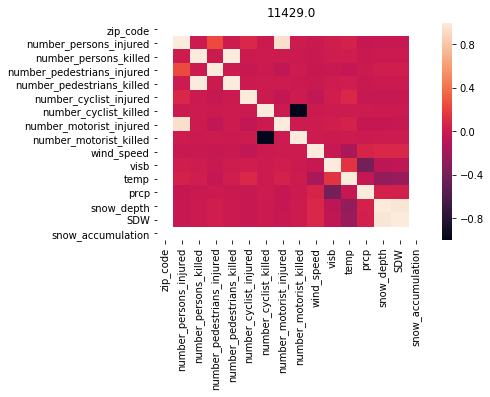

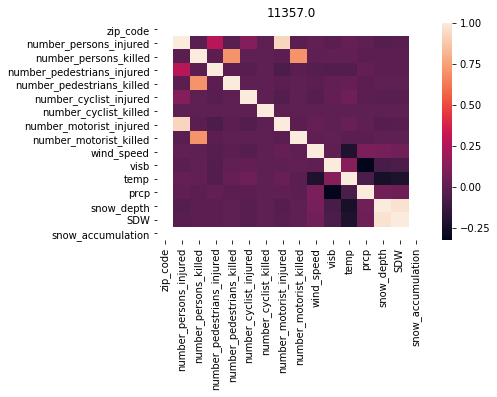

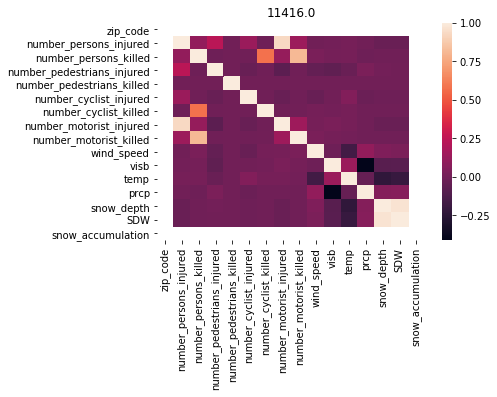

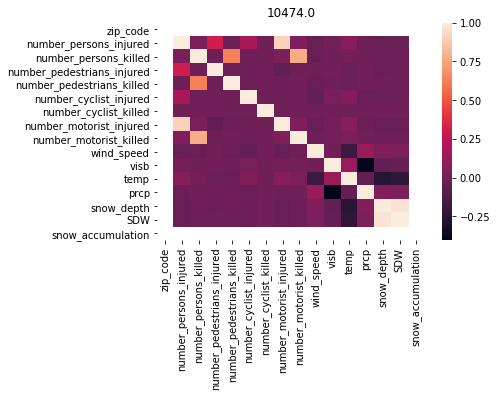

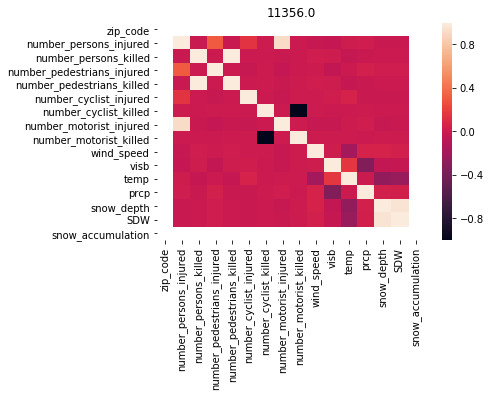

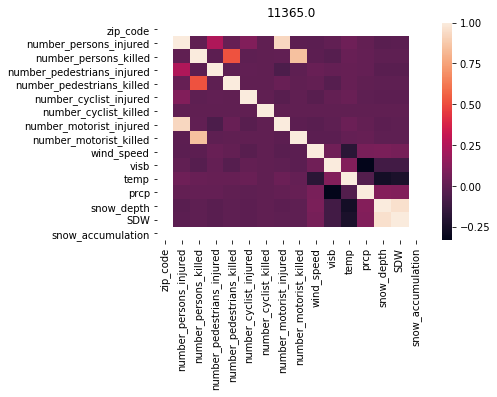

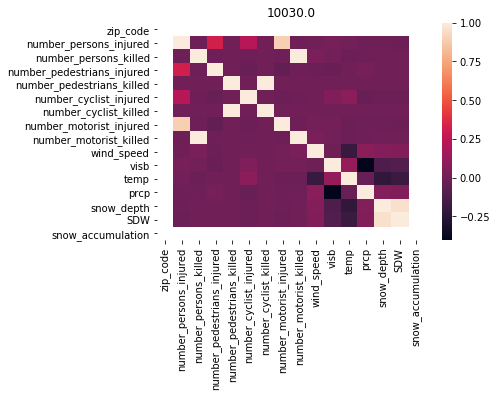

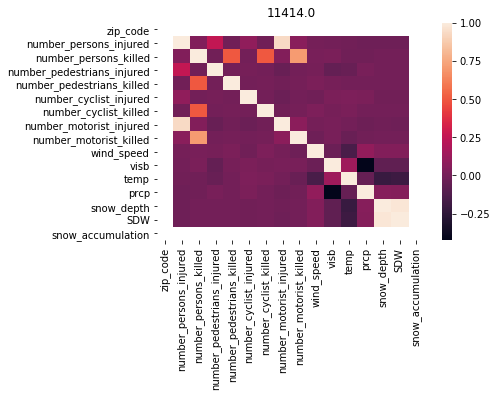

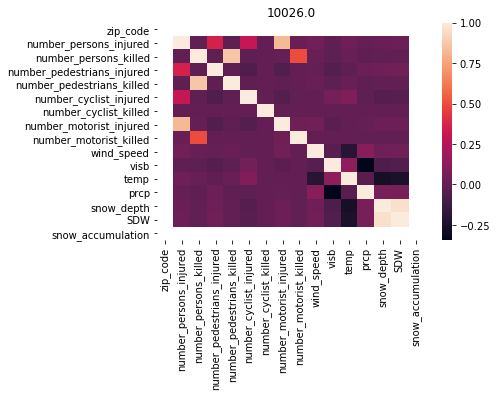

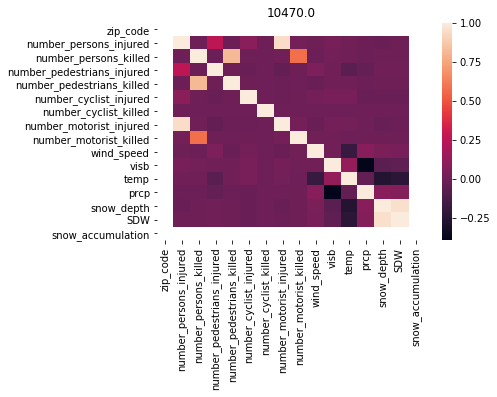

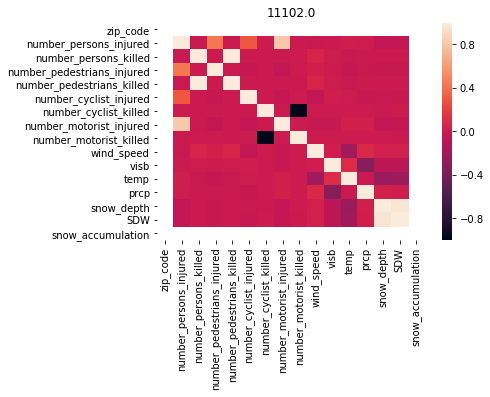

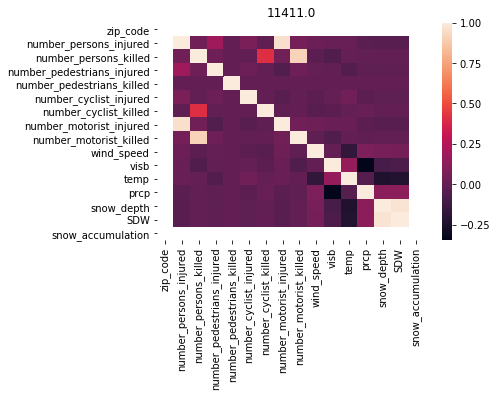

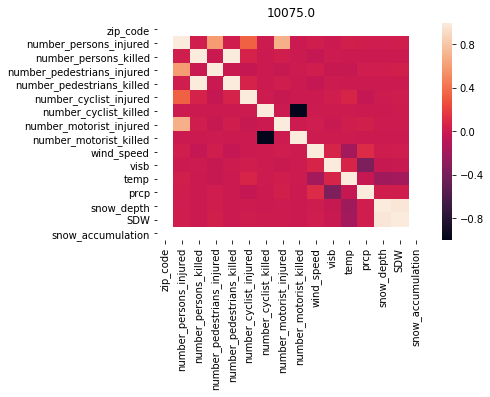

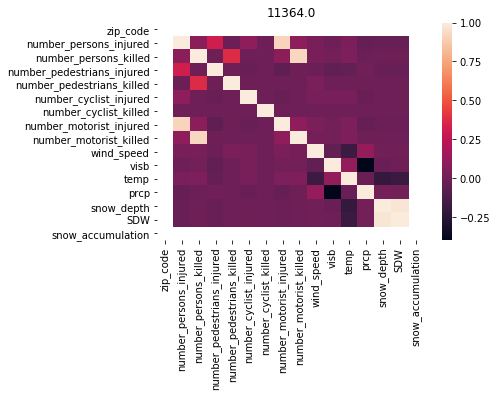

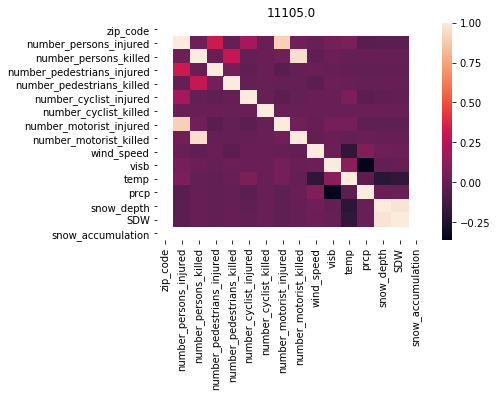

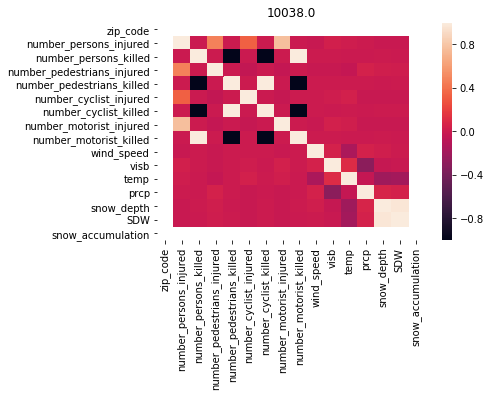

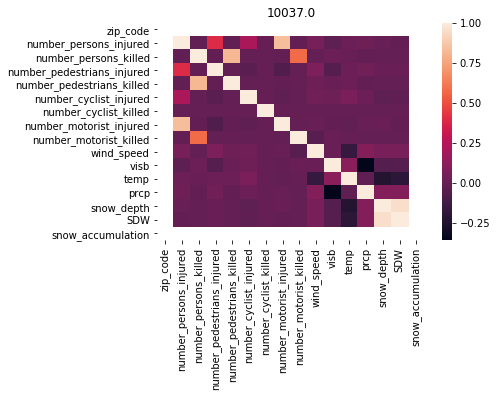

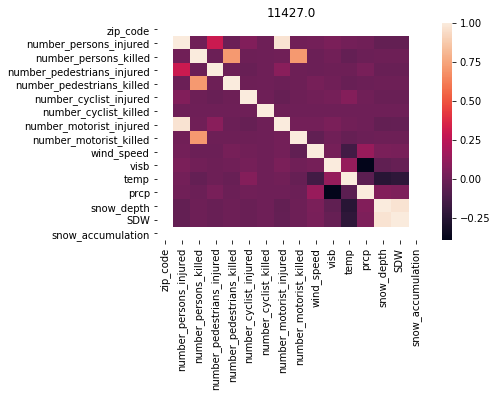

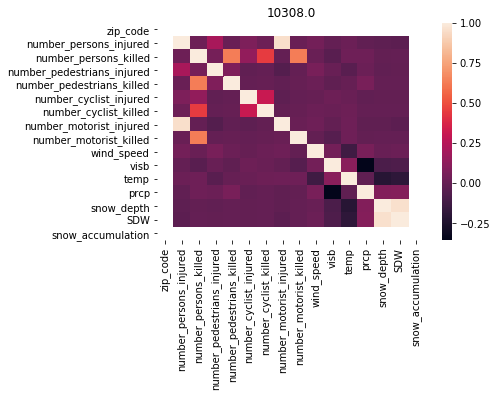

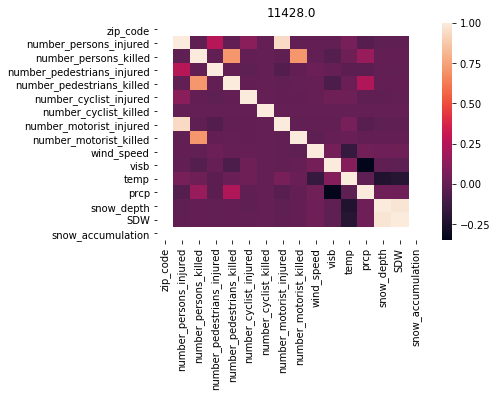

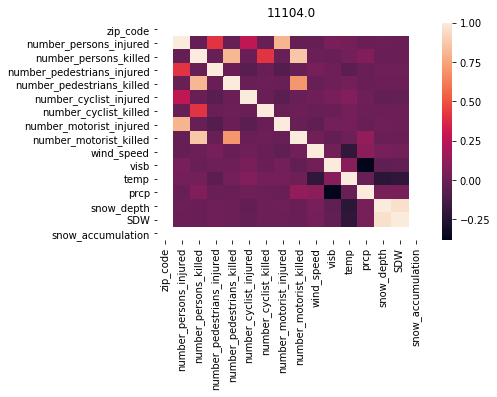

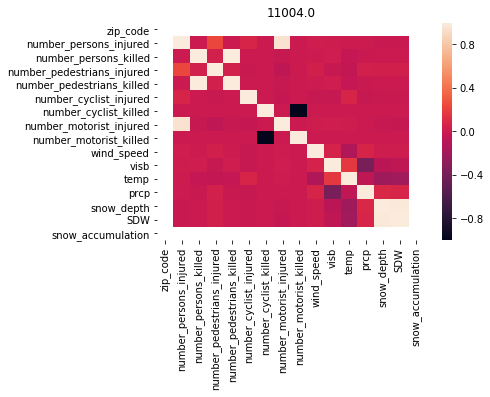

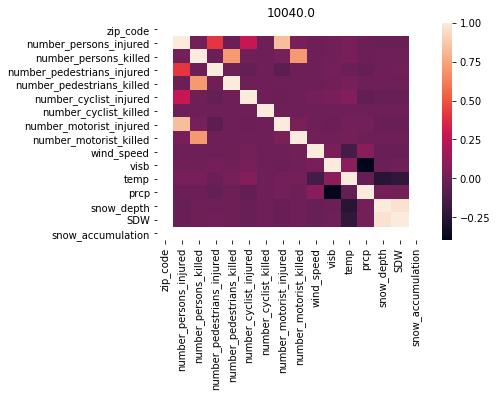

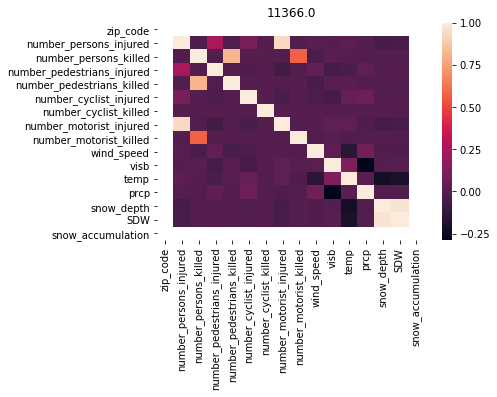

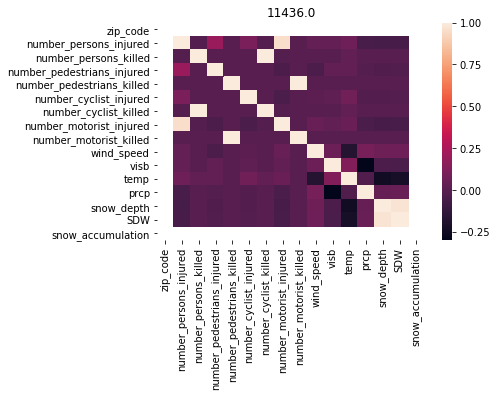

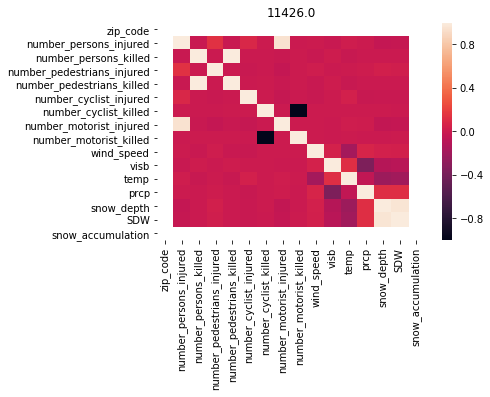

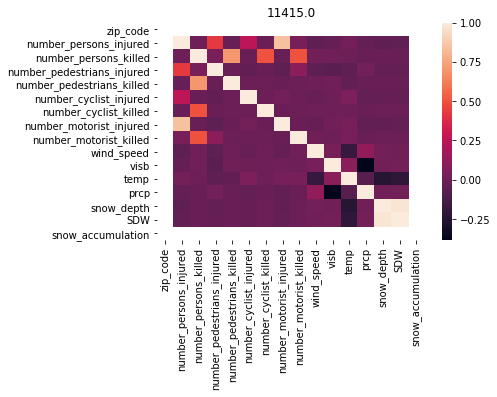

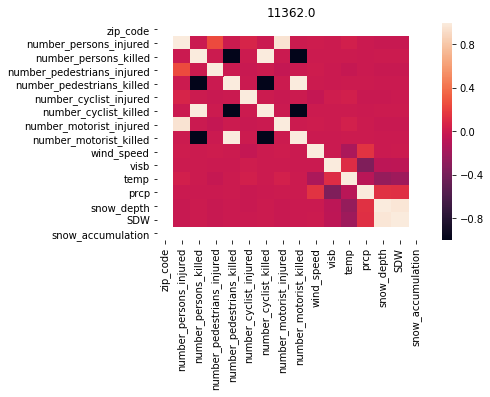

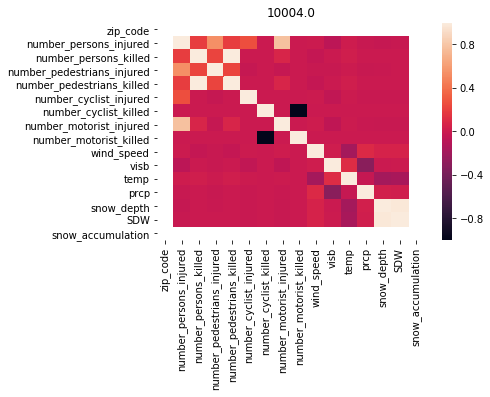

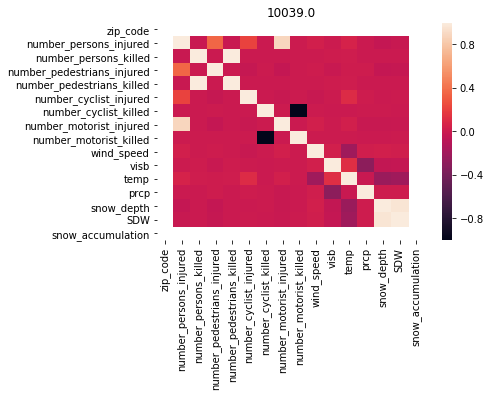

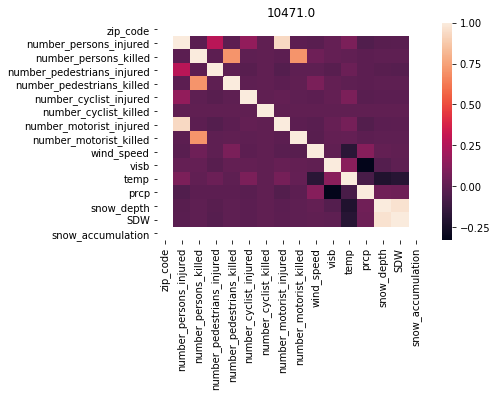

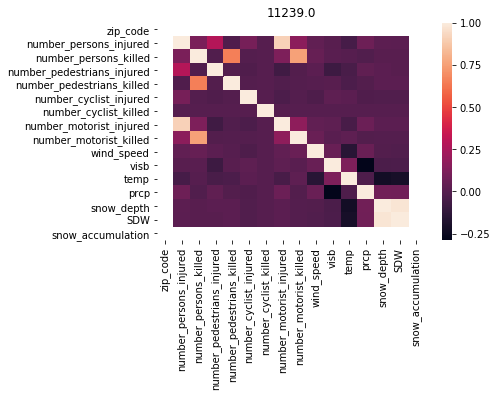

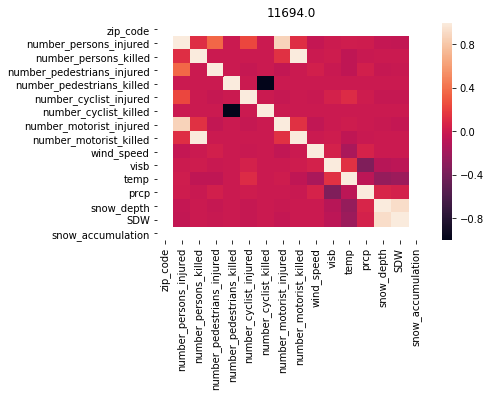

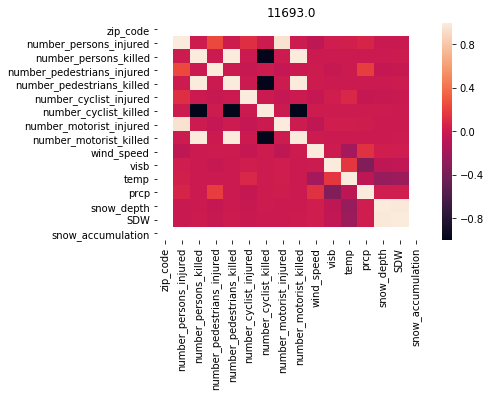

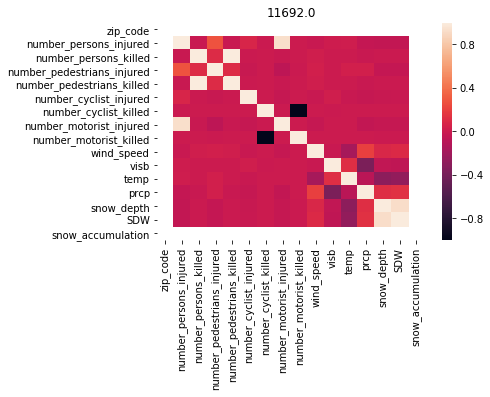

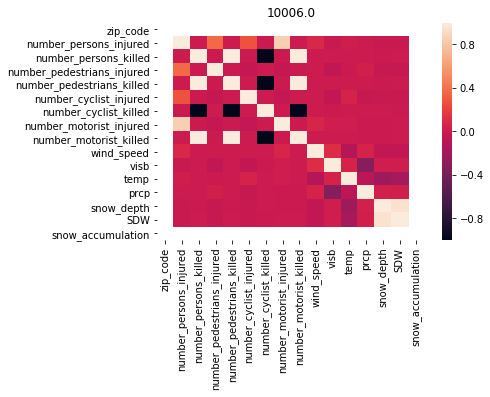

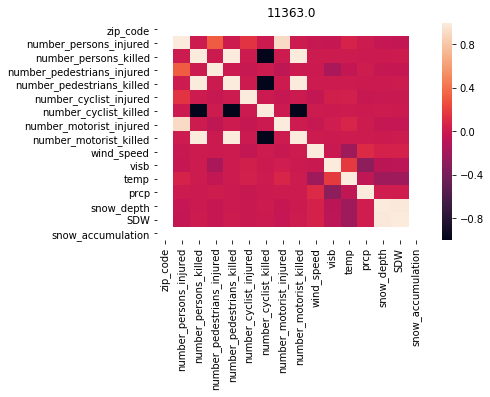

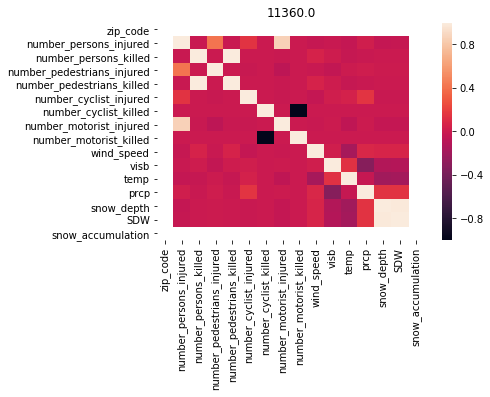

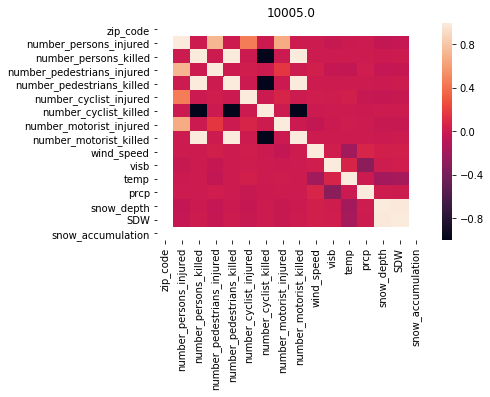

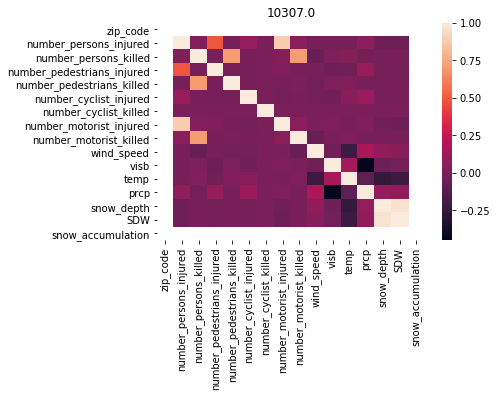

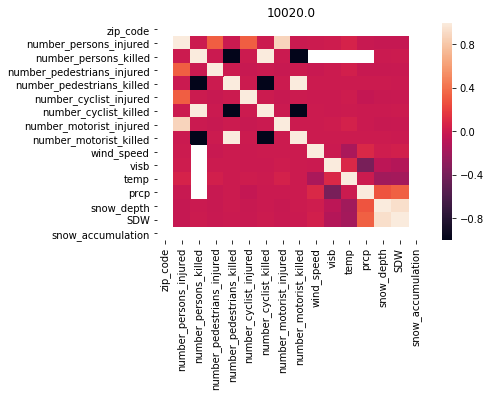

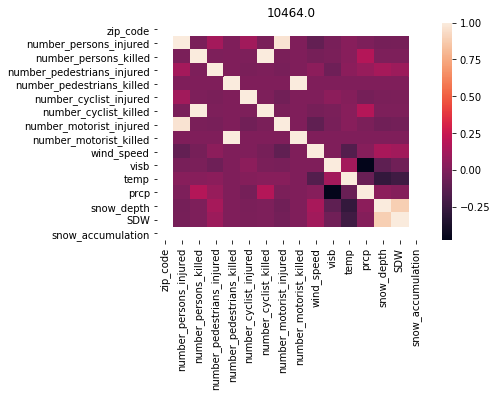

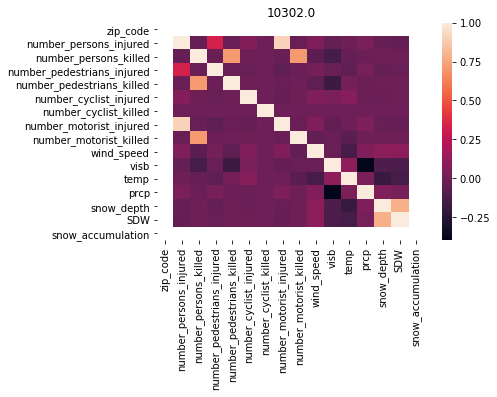

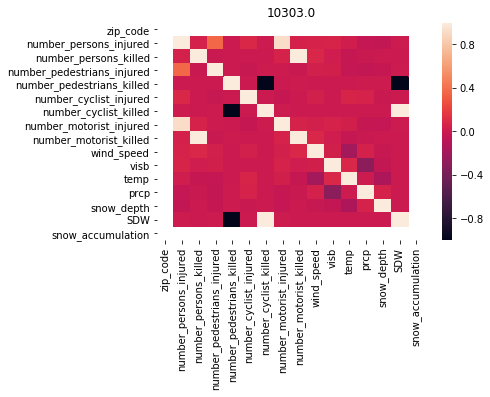

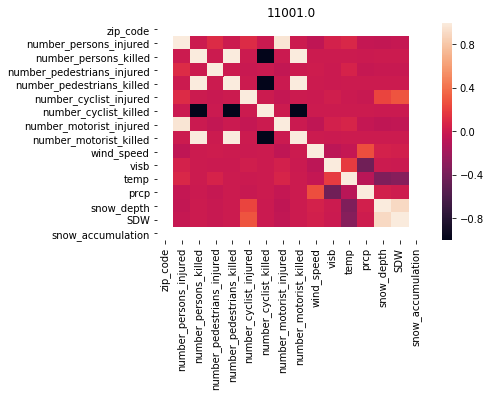

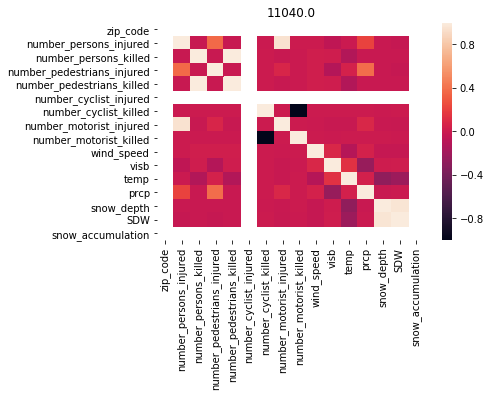

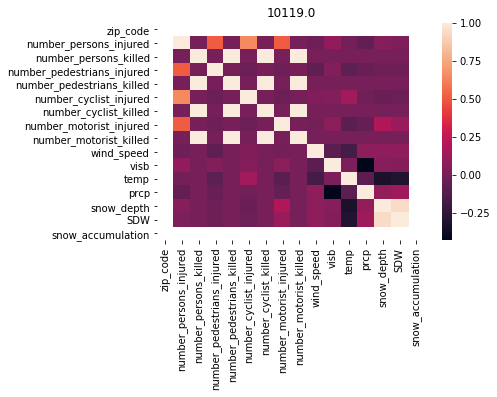

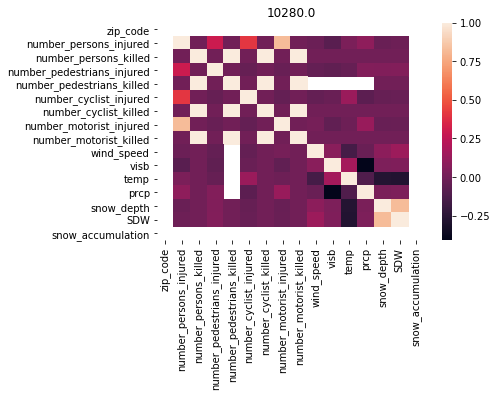

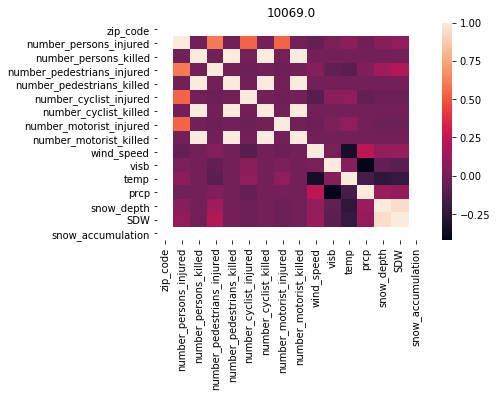

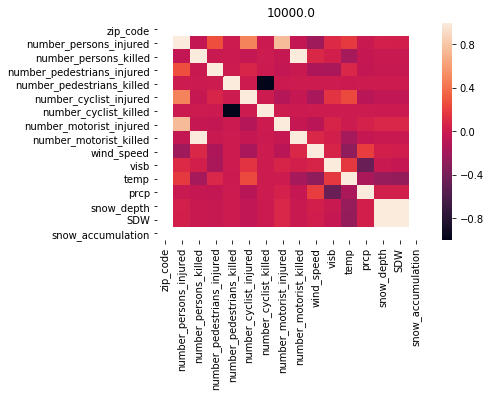

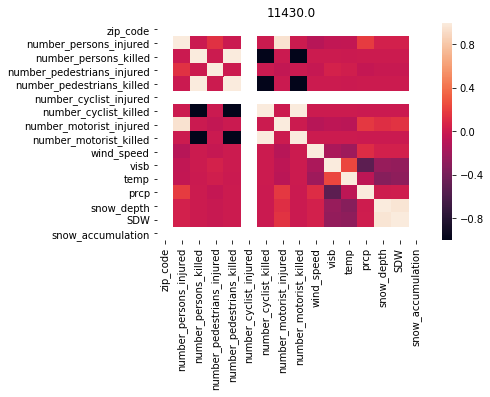

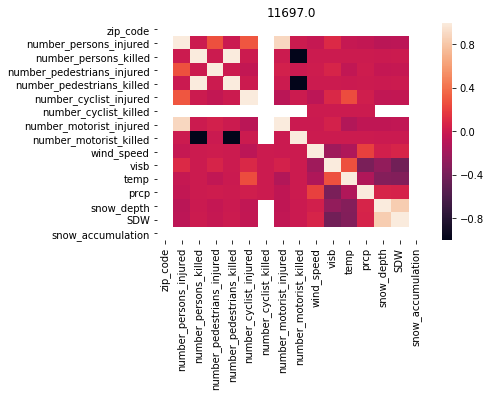

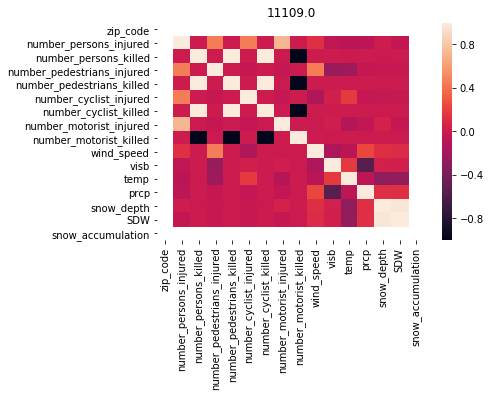

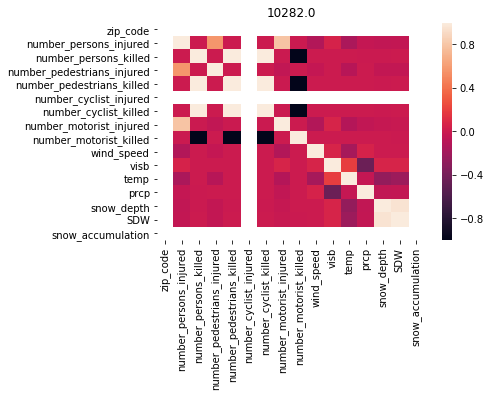

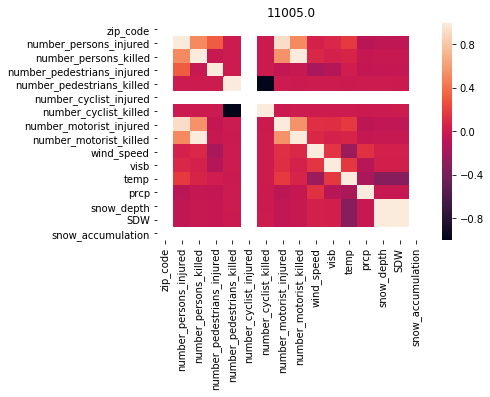

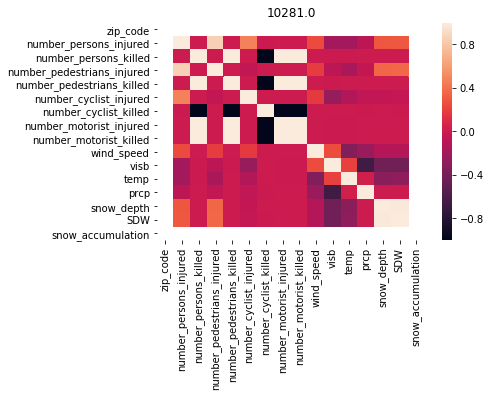

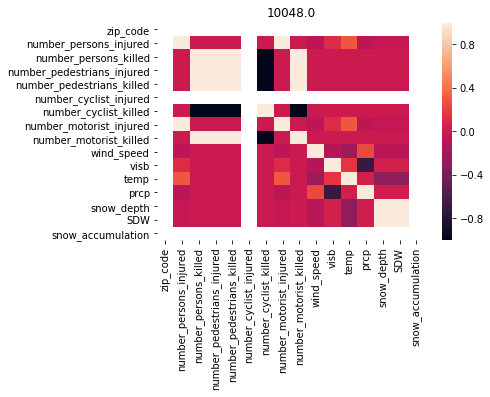

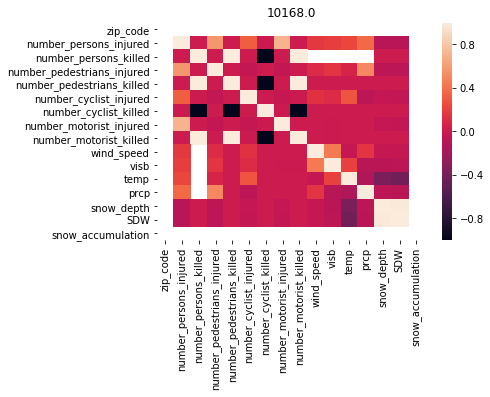

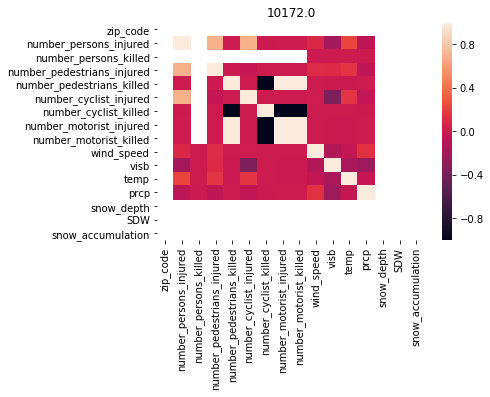

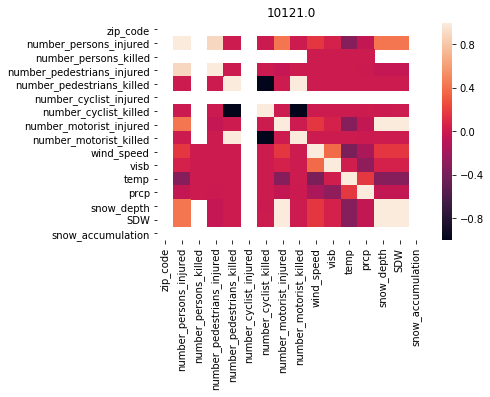

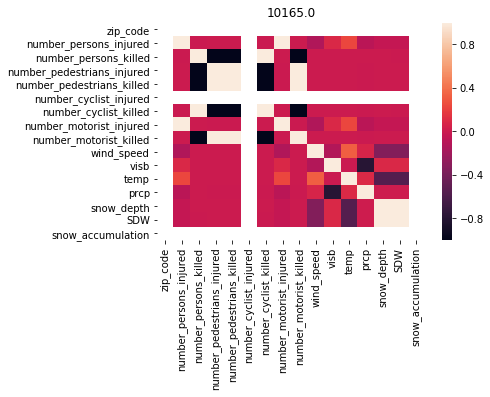

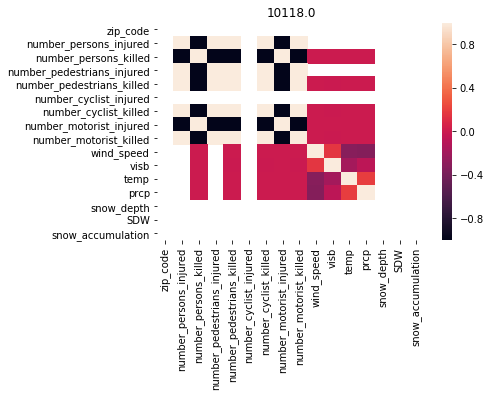

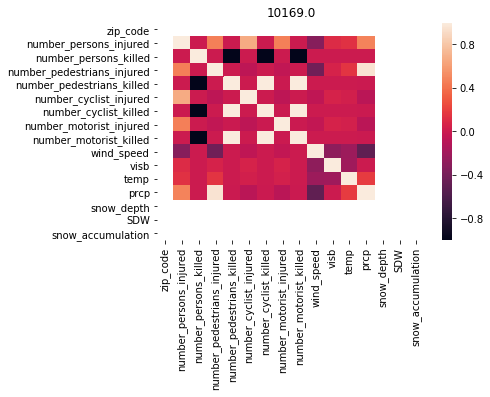

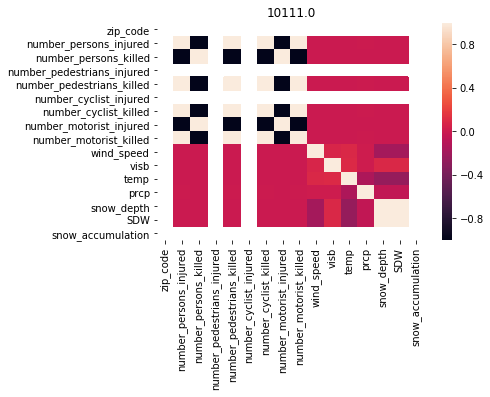

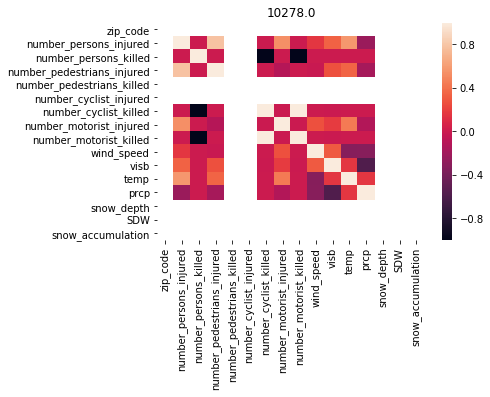

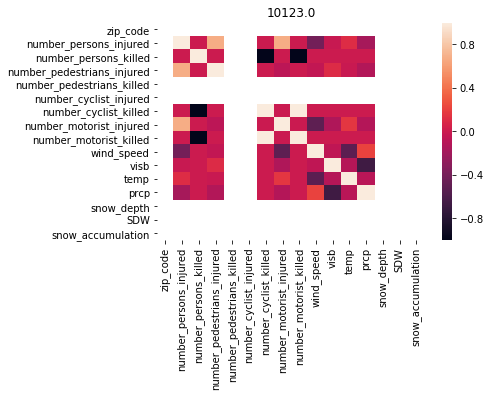

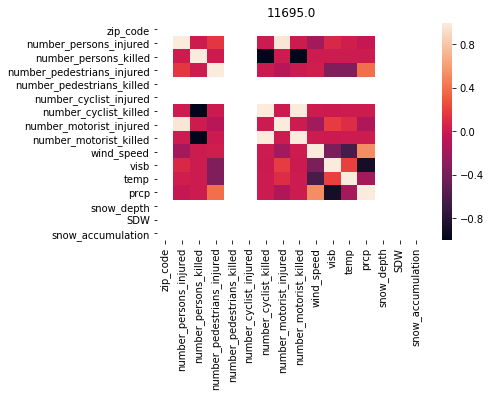

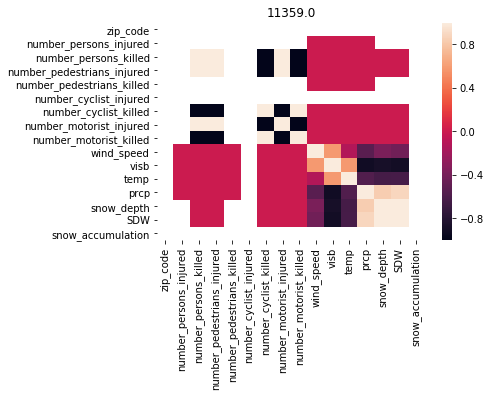

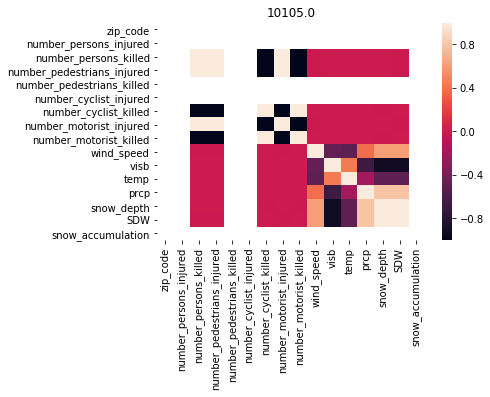

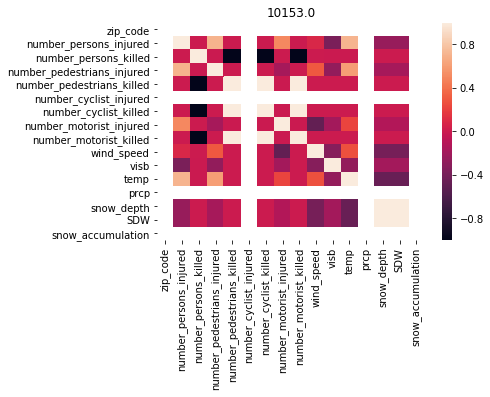

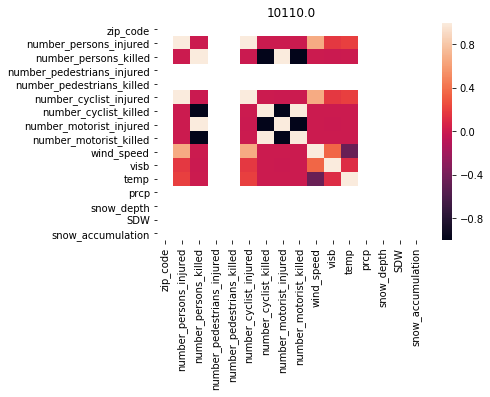

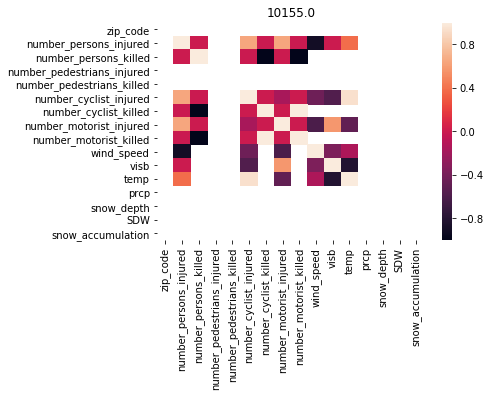

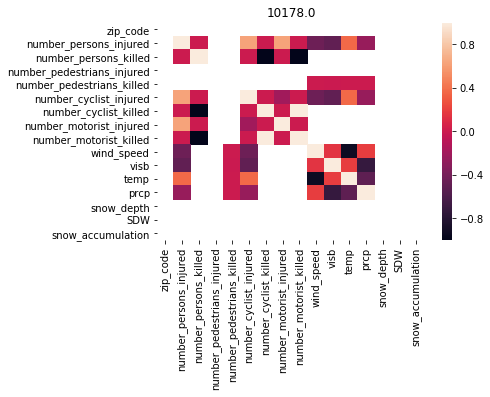

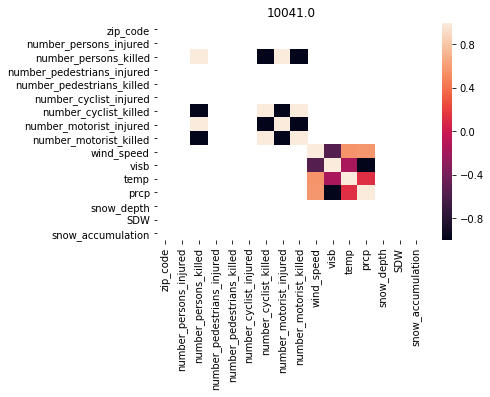

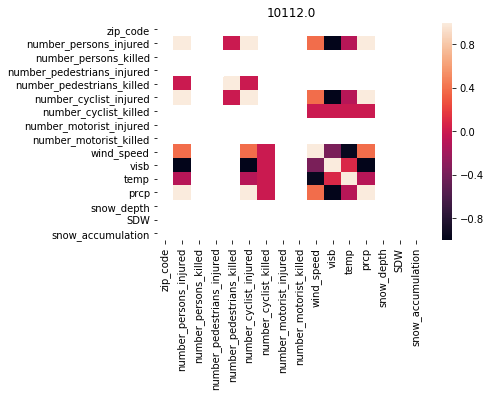

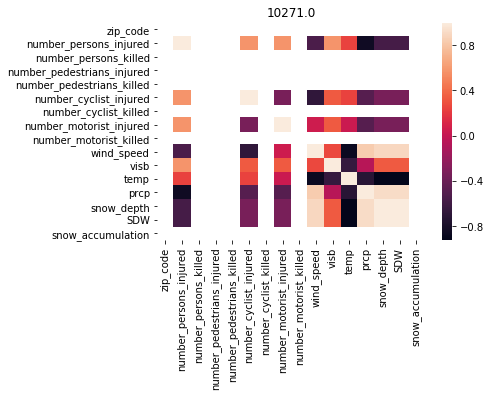

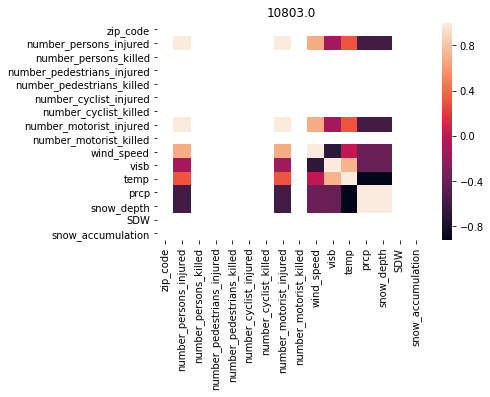

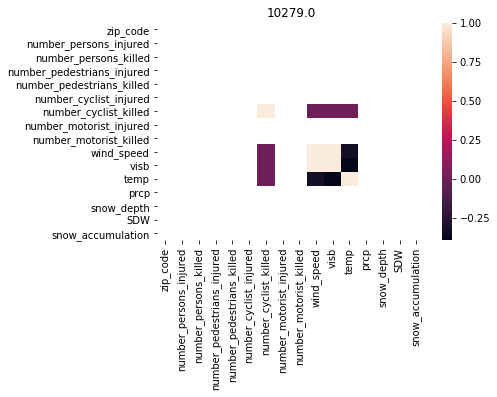

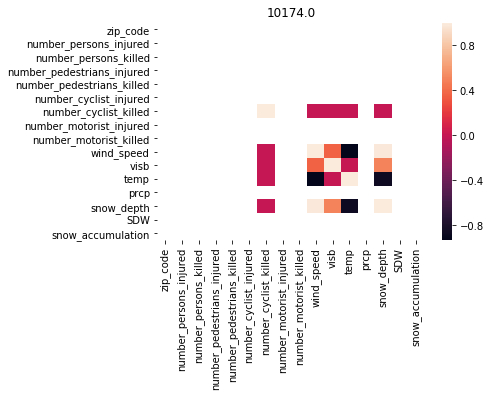

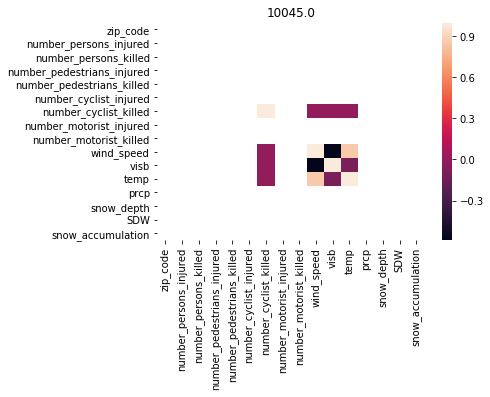

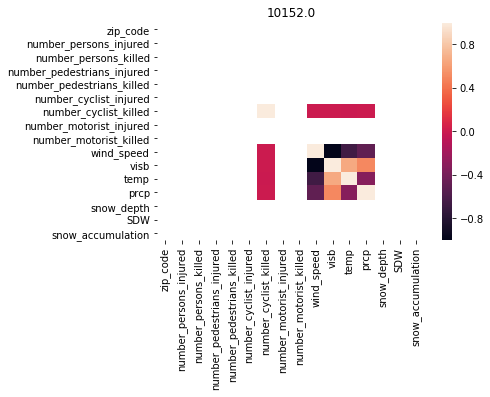

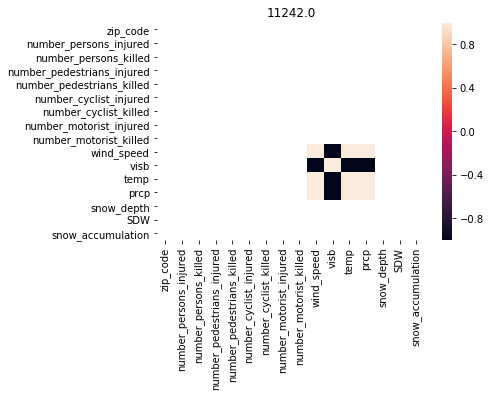

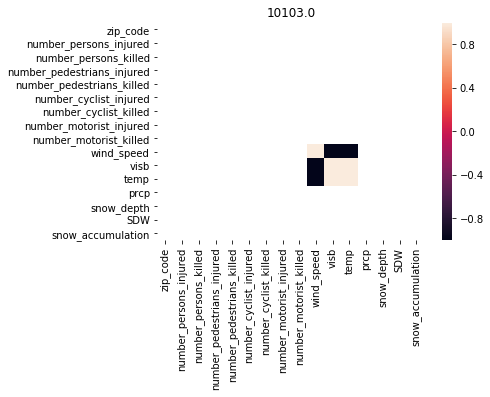

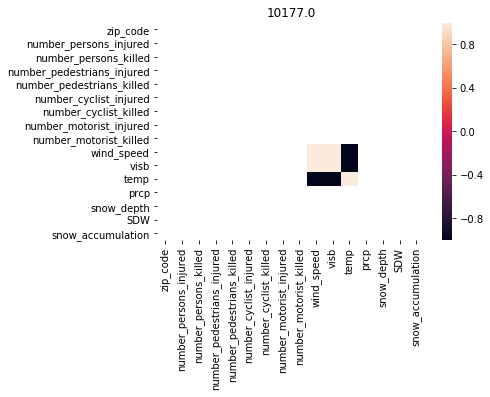

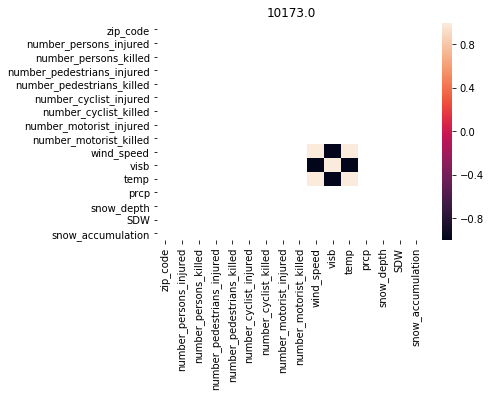

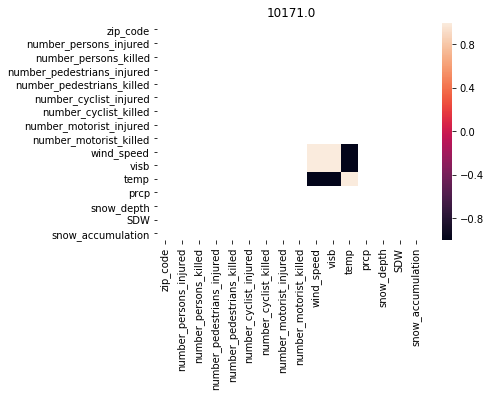

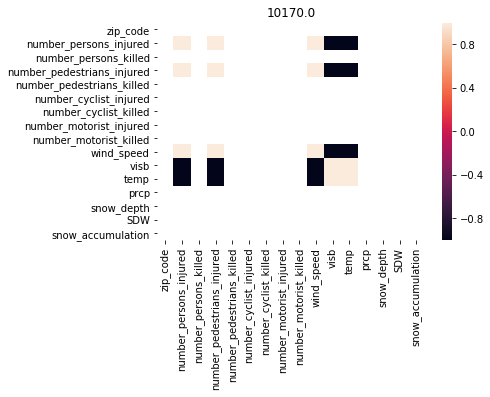

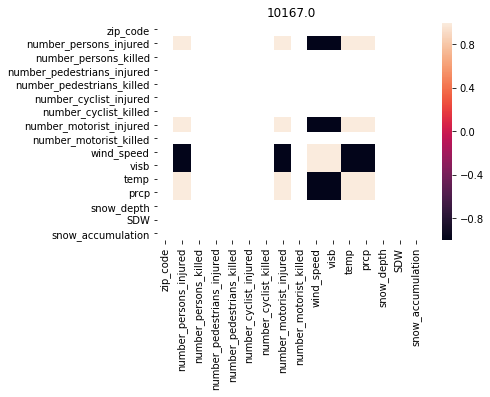

ValueError: zero-size array to reduction operation minimum which has no identity

In [297]:
for z in zips:
    corr = corrByZip(df_cw,z)
    corrMat(corr,z)

In [298]:
#zipcode == 10034 
#11423
#change pattern: 11430, 11697,11109,10282,10048,10111,10278,11359,10153

#Interesting: 10110,10155,10178,10271


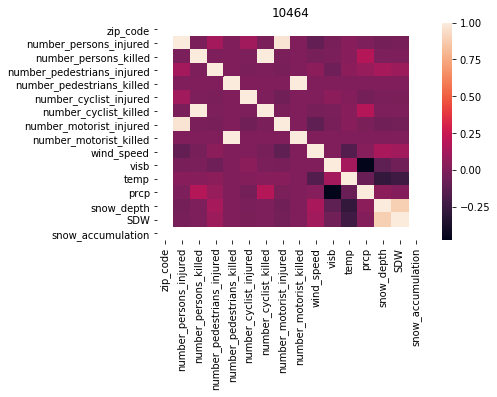

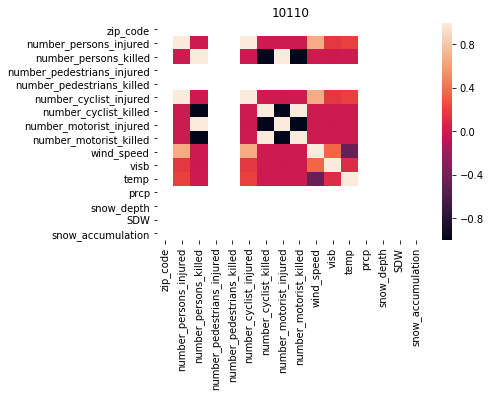

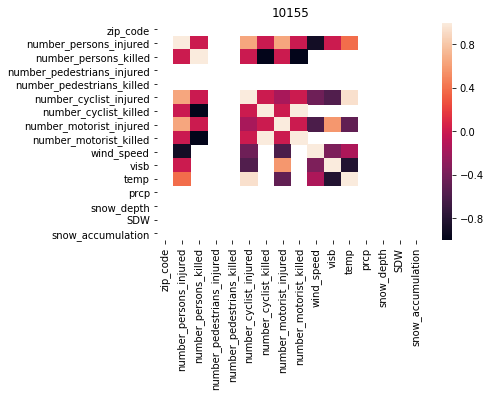

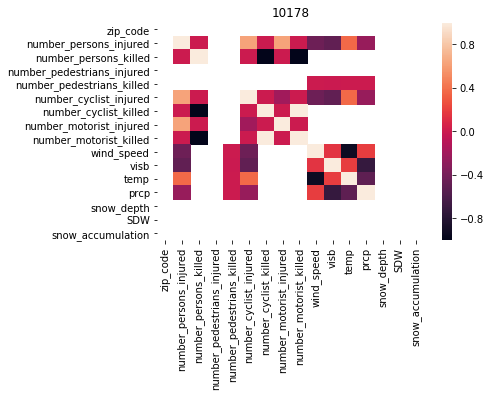

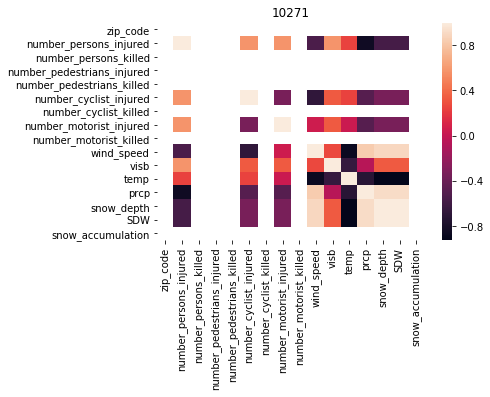

In [90]:
interesting_zip = [10464,10110,10155,10178,10271]
corr_l = []
for z in interesting_zip:
    corr = corrByZip(df_cw,z)
    corr_l.append(corr)
    corrMat(corr,str(z))

In [76]:
df_zip0 = df_cw[df_cw['zip_code']==10464.0]
zip0_cor = df_zip0.corr()
zip0_cor[zip0_cor>0.5]

zip_code  number_persons_injured  \
zip_code                         NaN                     NaN   
number_persons_injured           NaN                1.000000   
number_persons_killed            NaN                     NaN   
number_pedestrians_injured       NaN                     NaN   
number_pedestrians_killed        NaN                     NaN   
number_cyclist_injured           NaN                     NaN   
number_cyclist_killed            NaN                     NaN   
number_motorist_injured          NaN                0.970303   
number_motorist_killed           NaN                     NaN   
wind_speed                       NaN                     NaN   
visb                             NaN                     NaN   
temp                             NaN                     NaN   
prcp                             NaN                     NaN   
snow_depth                       NaN                     NaN   
SDW                              NaN                     NaN   
snow_accumulation                NaN                     NaN   

                            number_persons_killed  number_pedestrians_injured  \
zip_code                                      NaN                         NaN   
number_persons_injured                        NaN                         NaN   
number_persons_killed                         1.0                         NaN   
number_pedestrians_injured                    NaN                         1.0   
number_pedestrians_killed                     NaN                         NaN   
number_cyclist_injured                        NaN                         NaN   
number_cyclist_killed                         1.0                         NaN   
number_motorist_injured                       NaN                         NaN   
number_motorist_killed                        NaN                         NaN   
wind_speed                                    NaN                         NaN   
visb                                          NaN                         NaN   
temp                                          NaN                         NaN   
prcp                                          NaN                         NaN   
snow_depth                                    NaN                         NaN   
SDW                                           NaN                         NaN   
snow_accumulation                             NaN                         NaN   

                            number_pedestrians_killed  number_cyclist_injured  \
zip_code                                          NaN                     NaN   
number_persons_injured                            NaN                     NaN   
number_persons_killed                             NaN                     NaN   
number_pedestrians_injured                        NaN                     NaN   
number_pedestrians_killed                         1.0                     NaN   
number_cyclist_injured                            NaN                     1.0   
number_cyclist_killed                             NaN                     NaN   
number_motorist_injured                           NaN                     NaN   
number_motorist_killed                            1.0                     NaN   
wind_speed                                        NaN                     NaN   
visb                                              NaN                     NaN   
temp                                              NaN                     NaN   
prcp                                              NaN                     NaN   
snow_depth                                        NaN                     NaN   
SDW                                               NaN                     NaN   
snow_accumulation                                 NaN                     NaN   

                            number_cyclist_killed  number_motorist_injured  \
zip_code                                      NaN                      NaN   
number_persons_injured     

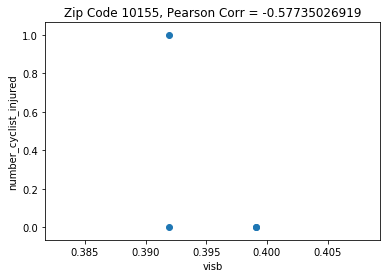

-0.57735026918962562

In [64]:
#zipcode 10155

df_zip1 = df_cw[df_cw['zip_code']==10155.0]
df_zip1 = df_zip1.dropna(axis = 0, how = "any")
x = 'visb'
y = 'number_cyclist_injured'
plt.scatter(df_zip1[x],df_zip1[y])
corr_temp = np.corrcoef(df_zip1[x],df_zip1[y])[0][1]
plt.xlabel(x)
plt.ylabel(y)
plt.title('Zip Code 10155, Pearson Corr = %s'%corr_temp)
plt.savefig('zip_t_inj.jpg')
plt.show()

corr_temp

In [71]:
df_zip1 = df_cw[df_cw['zip_code']==10155.0]
zip1_cor = df_zip1.corr()
zip1_cor[zip1_cor<-0.5]

zip_code  number_persons_injured  \
zip_code                         NaN                     NaN   
number_persons_injured           NaN                     NaN   
number_persons_killed            NaN                     NaN   
number_pedestrians_injured       NaN                     NaN   
number_pedestrians_killed        NaN                     NaN   
number_cyclist_injured           NaN                     NaN   
number_cyclist_killed            NaN                     NaN   
number_motorist_injured          NaN                     NaN   
number_motorist_killed           NaN                     NaN   
wind_speed                       NaN               -0.904885   
visb                             NaN                     NaN   
temp                             NaN                     NaN   
prcp                             NaN                     NaN   
snow_depth                       NaN                     NaN   
SDW                              NaN                     NaN   
snow_accumulation                NaN                     NaN   

                            number_persons_killed  number_pedestrians_injured  \
zip_code                                      NaN                         NaN   
number_persons_injured                        NaN                         NaN   
number_persons_killed                         NaN                         NaN   
number_pedestrians_injured                    NaN                         NaN   
number_pedestrians_killed                     NaN                         NaN   
number_cyclist_injured                        NaN                         NaN   
number_cyclist_killed                        -1.0                         NaN   
number_motorist_injured                       NaN                         NaN   
number_motorist_killed                       -1.0                         NaN   
wind_speed                                    NaN                         NaN   
visb                                          NaN                         NaN   
temp                                          NaN                         NaN   
prcp                                          NaN                         NaN   
snow_depth                                    NaN                         NaN   
SDW                                           NaN                         NaN   
snow_accumulation                             NaN                         NaN   

                            number_pedestrians_killed  number_cyclist_injured  \
zip_code                                          NaN                     NaN   
number_persons_injured                            NaN                     NaN   
number_persons_killed                             NaN                     NaN   
number_pedestrians_injured                        NaN                     NaN   
number_pedestrians_killed                         NaN                     NaN   
number_cyclist_injured                            NaN                     NaN   
number_cyclist_killed                             NaN                     NaN   
number_motorist_injured                           NaN                     NaN   
number_motorist_killed                            NaN                     NaN   
wind_speed                                        NaN                     NaN   
visb                                              NaN                -0.57735   
temp                                              NaN                     NaN   
prcp                                              NaN                     NaN   
snow_depth                                        NaN                     NaN   
SDW                                               NaN                     NaN   
snow_accumulation                                 NaN                     NaN   

                            number_cyclist_killed  number_motorist_injured  \
zip_code                                      NaN                      NaN   
number_persons_injured     

In [73]:
df_zip2 = df_cw[df_cw['zip_code']==10271.0]
zip2_cor = df_zip2.corr()
zip2_cor[zip2_cor<-0.5]

zip_code  number_persons_injured  \
zip_code                         NaN                     NaN   
number_persons_injured           NaN                     NaN   
number_persons_killed            NaN                     NaN   
number_pedestrians_injured       NaN                     NaN   
number_pedestrians_killed        NaN                     NaN   
number_cyclist_injured           NaN                     NaN   
number_cyclist_killed            NaN                     NaN   
number_motorist_injured          NaN                     NaN   
number_motorist_killed           NaN                     NaN   
wind_speed                       NaN               -0.546816   
visb                             NaN                     NaN   
temp                             NaN                     NaN   
prcp                             NaN               -0.846971   
snow_depth                       NaN               -0.577350   
SDW                              NaN               -0.577350   
snow_accumulation                NaN                     NaN   

                            number_persons_killed  number_pedestrians_injured  \
zip_code                                      NaN                         NaN   
number_persons_injured                        NaN                         NaN   
number_persons_killed                         NaN                         NaN   
number_pedestrians_injured                    NaN                         NaN   
number_pedestrians_killed                     NaN                         NaN   
number_cyclist_injured                        NaN                         NaN   
number_cyclist_killed                         NaN                         NaN   
number_motorist_injured                       NaN                         NaN   
number_motorist_killed                        NaN                         NaN   
wind_speed                                    NaN                         NaN   
visb                                          NaN                         NaN   
temp                                          NaN                         NaN   
prcp                                          NaN                         NaN   
snow_depth                                    NaN                         NaN   
SDW                                           NaN                         NaN   
snow_accumulation                             NaN                         NaN   

                            number_pedestrians_killed  number_cyclist_injured  \
zip_code                                          NaN                     NaN   
number_persons_injured                            NaN                     NaN   
number_persons_killed                             NaN                     NaN   
number_pedestrians_injured                        NaN                     NaN   
number_pedestrians_killed                         NaN                     NaN   
number_cyclist_injured                            NaN                     NaN   
number_cyclist_killed                             NaN                     NaN   
number_motorist_injured                           NaN                     NaN   
number_motorist_killed                            NaN                     NaN   
wind_speed                                        NaN               -0.678936   
visb                                              NaN                     NaN   
temp                                              NaN                     NaN   
prcp                                              NaN                     NaN   
snow_depth                                        NaN                     NaN   
SDW                                               NaN                     NaN   
snow_accumulation                                 NaN                     NaN   

                            number_cyclist_killed  number_motorist_injured  \
zip_code                                      NaN                      NaN   
number_persons_injured     

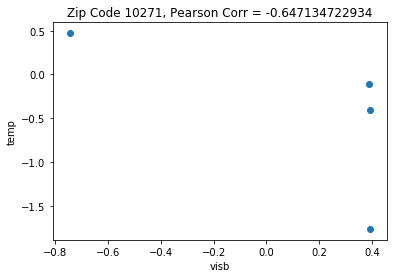

-0.647134722933985

In [66]:
#zipcode 10271
corr_10155 = []
df_zip1 = df_cw[df_cw['zip_code']==10271.0]
df_zip1 = df_zip1.dropna(axis = 0, how = "any")
x = 'visb'
y = 'temp'
plt.scatter(df_zip1[x],df_zip1[y])
corr_temp = np.corrcoef(df_zip1[x],df_zip1[y])[0][1]
plt.xlabel(x)
plt.ylabel(y)
plt.title('Zip Code 10271, Pearson Corr = %s'%corr_temp)
plt.savefig('zip_v_prcp.jpg')
plt.show()

corr_temp

In [300]:
def corrBySlot(df,slot):
    df_slot = df[df['time_slot']==slot]
    corr = df_slot.corr()
    
    return corr

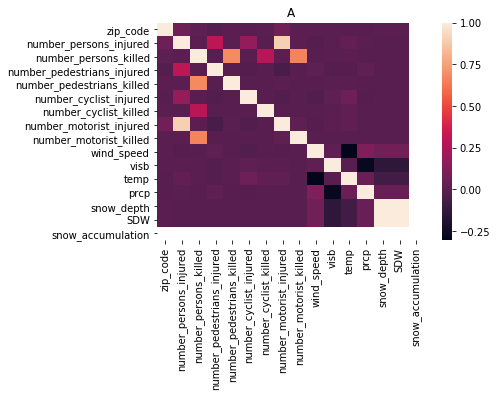

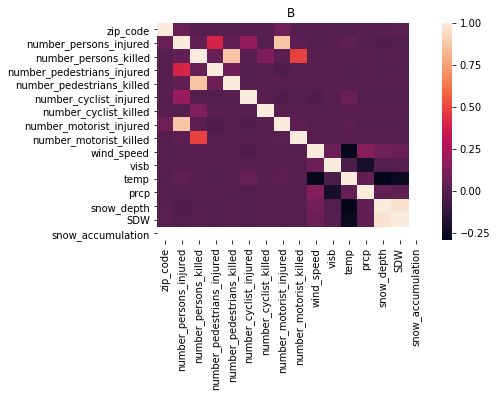

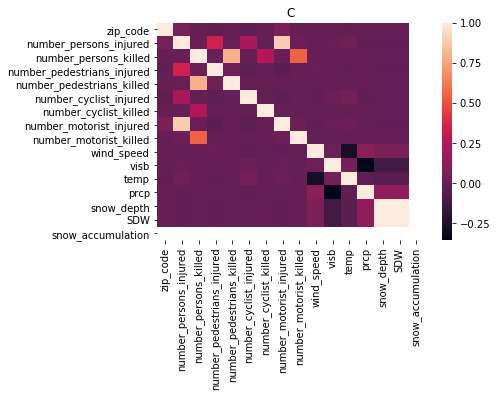

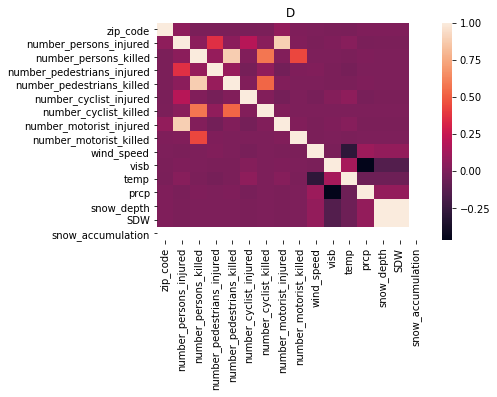

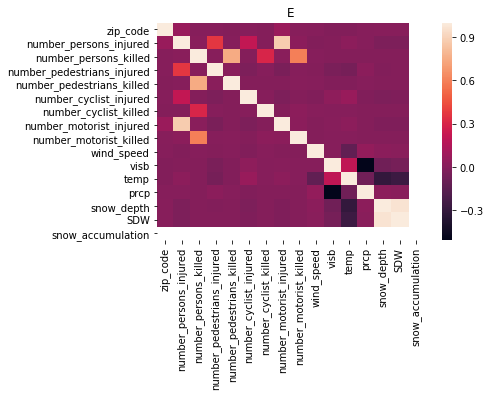

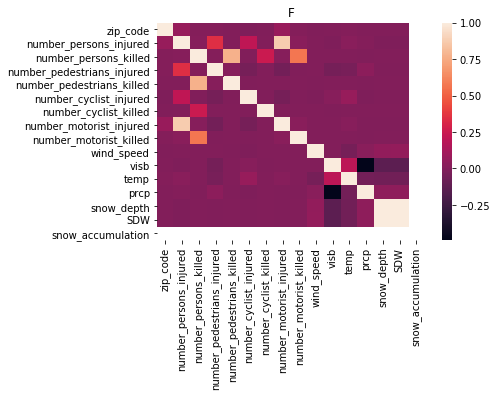

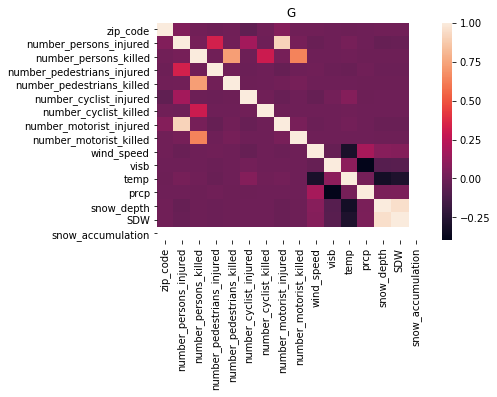

In [303]:
slots = ['A','B','C','D','E','F','G']
corr_s = []
for s in slots:
    corr = corrBySlot(df_cw,s)
    corr_s.append(corr)
    corrMat(corr,s)

In [100]:
df_cw['veh_col_total'] = df_cw['number_persons_injured'] + df_cw['number_persons_killed'] + \
df_cw['number_pedestrians_injured'] + df_cw['number_pedestrians_killed'] + \
df_cw['number_cyclist_injured'] + df_cw['number_cyclist_killed'] + \
df_cw['number_motorist_injured'] + df_cw['number_motorist_killed']

df_cw = df_cw.drop(['number_persons_injured', 'number_persons_killed', 'number_pedestrians_injured', 'number_pedestrians_killed',
           'number_cyclist_injured', 'number_cyclist_killed', 'number_motorist_injured', 'number_motorist_killed'], axis=1)

In [114]:
rain = df_cw[df_cw['prcp']>0]
rain.head()

date time_slot  zip_code  wind_speed      visb      temp      prcp  \
3   2015-07-16         B   11361.0    0.327579  0.389526  0.577298  0.051331   
5   2015-07-15         G   10031.0   -1.086535  0.392469  1.073913  0.235598   
6   2015-07-15         G   10034.0   -1.086535  0.392469  1.073913  0.235598   
12  2015-07-09         G   11218.0   -1.436699  0.391265  1.072058  1.808118   
13  2015-07-09         G   10013.0   -1.436699  0.391265  1.072058  1.808118   

    snow_depth      SDW  snow_accumulation month  veh_col_total  
3    -0.143496 -0.12736                0.0    07      -1.108430  
5    -0.143496 -0.12736                0.0    07       1.677616  
6    -0.143496 -0.12736                0.0    07      -1.108430  
12   -0.143496 -0.12736                0.0    07      -1.108430  
13   -0.143496 -0.12736                0.0    07      -1.108430

In [115]:
pearsonr(rain['veh_col_total'],rain['prcp'])

(-0.0080261667860290643, 0.018647395626998787)

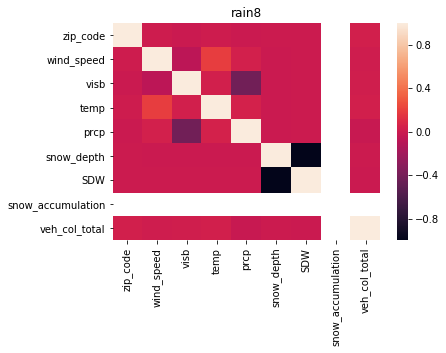

In [117]:
corr_rain8 = corrByMonth(rain,'08')
corrMat(corr_rain8,'rain8')

In [118]:
df_binary = df_cw.copy()



In [119]:
df_binary[df_binary['prcp']>0] = 1

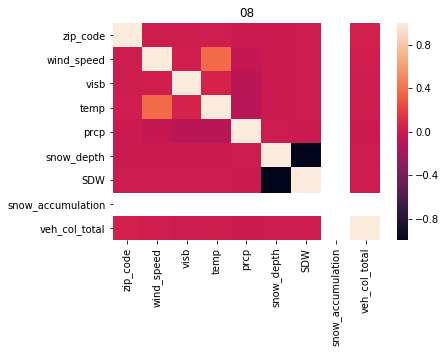

In [124]:
df_binary = df_binary[pd.notnull(df_binary['prcp'])]
corr_binary = corrByMonth(df_binary,'08')
corrMat(corr_binary,'08')